# Telecom Service - Churn
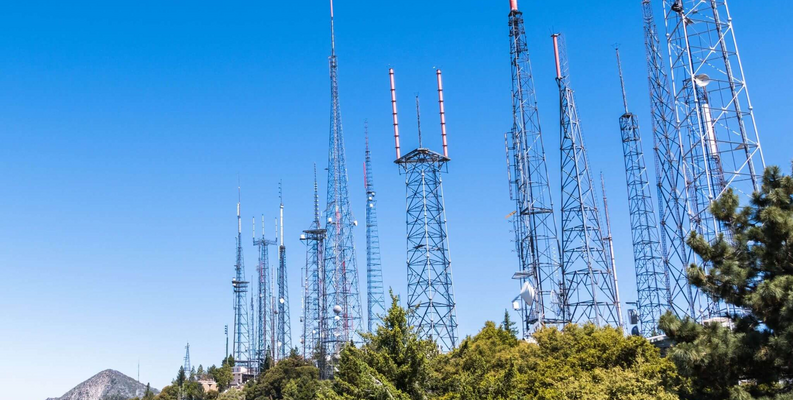
# Inspiration
we are inspired by tackling customer churn within the telecommunications sector stems from a profound interest in leveraging advanced analytics to solve real-world business problems. Driven by the challenge of transforming complex datasets into predictive models that can accurately forecast customer behaviors, we are motivated by the potential to implement machine learning solutions that not only predict churn but also enable proactive customer retention strategies. Our passion lies in optimizing algorithms and refining models to uncover the subtle patterns that influence customer decisions, thereby helping businesses enhance customer satisfaction, reduce turnover, and ultimately drive sustainable growth. This commitment to applying cutting-edge data science techniques for practical and impactful outcomes encapsulates OUR role and goals as a Machine Learning Engineer.

# Importing Libraries 
Imports necessary libraries such as NumPy, Pandas, Seaborn, Matplotlib, Plotly, and initializes Plotly for offline plotting.

In [1]:
#import libraries for mathematical manipulation, creating tables, displaying tables and making a plot 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Loading Dataset 
Loads a dataset named "telecom_customer_churn.csv" into a Pandas DataFrame called customers_churn

In [2]:
#importing dataset
customers_churn = pd.read_csv("telecom_customer_churn.csv",index_col=0)

# Exploring Dataset
Performs exploratory data analysis (EDA) on the telecom customer churn dataset, including data summary, visualization, and missing value detection.

In [3]:
# Displays the first five rows of the dataset transposed
customers_churn.head().T

Customer ID                          0002-ORFBO      0003-MKNFE  \
Gender                                   Female            Male   
Age                                          37              46   
Married                                     Yes              No   
Number of Dependents                          0               0   
City                               Frazier Park        Glendale   
Zip Code                                  93225           91206   
Latitude                              34.827662       34.162515   
Longitude                           -118.999073     -118.203869   
Number of Referrals                           2               0   
Tenure in Months                              9               9   
Offer                                       NaN             NaN   
Phone Service                               Yes             Yes   
Avg Monthly Long Distance Charges         42.39           10.69   
Multiple Lines                               No             Yes   
Internet Service                            Yes             Yes   
Internet Type                             Cable           Cable   
Avg Monthly GB Download                    16.0            10.0   
Online Security                              No              No   
Online Backup                               Yes              No   
Device Protection Plan                       No              No   
Premium Tech Support                        Yes              No   
Streaming TV                                Yes              No   
Streaming Movies                             No             Yes   
Streaming Music                              No             Yes   
Unlimited Data                              Yes              No   
Contract                               One Year  Month-to-Month   
Paperless Billing                           Yes              No   
Payment Method                      Credit Card     Credit Card   
Monthly Charge                             65.6            -4.0   
Total Charges                             593.3           542.4   
Total Refunds                               0.0           38.33   
Total Extra Data Charges                      0              10   
Total Long Distance Charges              381.51           96.21   
Total Revenue                            974.81          610.28   
Customer Status                          Stayed          Stayed   
Churn Category                              NaN             NaN   
Churn Reason                                NaN             NaN   

Customer ID                                           0004-TLHLJ  \
Gender                                                      Male   
Age                                                           50   
Married                                                       No   
Number of Dependents                                           0   
City                                                  Costa Mesa   
Zip Code                                                   92627   
Latitude                                               33.645672   
Longitude                                            -117.922613   
Number of Referrals                                            0   
Tenure in Months                                               4   
Offer                                                    Offer E   
Phone Service                                                Yes   
Avg Monthly Long Distance Charges                          33.65   
Multiple Lines                                                No   
Internet Service                                             Yes   
Internet Type                                        Fiber Optic   
Avg Monthly GB Download                                     30.0   
Online Security                                               No   
Online Backup                                                 No   
Device Protection Plan                                       Yes   
Premium Tech Support     

In [4]:
#summary of infomation to identify datatype of each column
customers_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   City                               7043 non-null   object 
 5   Zip Code                           7043 non-null   int64  
 6   Latitude                           7043 non-null   float64
 7   Longitude                          7043 non-null   float64
 8   Number of Referrals                7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Offer                              3166 non-null   object 
 11  Phone Service                      7043 non-nu

In [5]:
# Checking the shape of the dataset (number of rows and columns)
customers_churn.shape

(7043, 37)

In [6]:
#check the total number of elements in the dataset.
customers_churn.size

260591

In [7]:
# Checks for and returns the number of duplicate rows in the dataset.
customers_churn.duplicated().sum()

0

In [8]:
# Generates descriptive statistics of the dataset.
customers_churn.describe()

Age  Number of Dependents      Zip Code     Latitude  \
count  7043.000000           7043.000000   7043.000000  7043.000000   
mean     46.509726              0.468692  93486.070567    36.197455   
std      16.750352              0.962802   1856.767505     2.468929   
min      19.000000              0.000000  90001.000000    32.555828   
25%      32.000000              0.000000  92101.000000    33.990646   
50%      46.000000              0.000000  93518.000000    36.205465   
75%      60.000000              0.000000  95329.000000    38.161321   
max      80.000000              9.000000  96150.000000    41.962127   

         Longitude  Number of Referrals  Tenure in Months  \
count  7043.000000          7043.000000       7043.000000   
mean   -119.756684             1.951867         32.386767   
std       2.154425             3.001199         24.542061   
min    -124.301372             0.000000          1.000000   
25%    -121.788090             0.000000          9.000000   
50%    -119.595293             0.000000         29.000000   
75%    -117.969795             3.000000         55.000000   
max    -114.192901            11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        6361.000000              5517.000000   
mean                           25.420517                26.189958   
std                            14.200374                19.586585   
min                             1.010000                 2.000000   
25%                            13.050000                13.000000   
50%                            25.690000                21.000000   
75%                            37.680000                30.000000   
max                            49.990000                85.000000   

       Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
count     7043.000000    7043.000000    7043.000000               7043.000000   
mean        63.596131    2280.381264       1.962182                  6.860713   
std         31.204743    2266.220462       7.902614                 25.104978   
min        -10.000000      18.800000       0.000000                  0.000000   
25%         30.400000     400.150000       0.000000                  0.000000   
50%         70.050000    1394.550000       0.000000                  0.000000   
75%         89.750000    3786.600000       0.000000                  0.000000   
max        118.750000    8684.800000      49.790000                150.000000   

       Total Long Distance Charges  Total Revenue  
count                  7043.000000    7043.000000  
mean                    749.099262    3034.379056  
std                     846.660055    2865.204542  
min                       0.000000      21.360000  
25%                      70.545000     605.610000  
50%                     401.440000    2108.640000  
75%                    1191.100000    4801.145000  
max                    3564.720000   11979.340000

# Grouping and Summarizing Data

In [9]:
# summarize and analyze data based on Customer Status and Monthly Charge
customers_churn.groupby('Customer Status')['Monthly Charge'].describe()

count       mean        std   min      25%     50%    75%  \
Customer Status                                                               
Churned          1869.0  73.347592  26.373764 -10.0  55.3000  79.500  94.20   
Joined            454.0  42.775991  24.612329  -8.0  20.1625  43.975  64.35   
Stayed           4720.0  61.737415  32.198758 -10.0  25.1000  65.600  89.55   

                    max  
Customer Status          
Churned          118.35  
Joined           107.95  
Stayed           118.75


This statistics table provides a comprehensive overview of monthly charges for customers categorized by their status: Churned, Joined, and Stayed. Each category's statistics include the count of observations, the mean monthly charge (which ranges from $42.78 for Joined customers to $73.35 for Churned customers), the standard deviation (indicating the spread of data around the mean), and various percentiles (such as the median and quartiles) that offer insights into the distribution of charges. Remarkably, negative values are observed in the minimum monthly charge, possibly suggesting data anomalies. These statistics enable a nuanced understanding of how monthly charges differ among customers based on their status, facilitating informed decision-making for service optimization and customer retention strategies

In [10]:
# summarize and analyze data based on Customer Status and Monthly Charge
customers_churn.groupby('Customer Status')['Monthly Charge'].value_counts()

Customer Status  Monthly Charge
Churned          74.40             13
                 74.90              9
                 45.30              8
                 74.95              7
                 85.35              7
                                   ..
Stayed           63.15              1
                 63.10              1
                 63.05              1
                 62.85              1
                 118.75             1
Name: count, Length: 2631, dtype: int64

In [11]:
# summarize and analyze data based on Customer Status and Total Charges
customers_churn.groupby('Customer Status')['Total Charges'].describe()

count         mean          std    min       25%       50%  \
Customer Status                                                                
Churned          1869.0  1531.796094  1890.822994  18.85  134.5000   703.550   
Joined            454.0    79.292731    67.286088  18.80   25.2500    51.425   
Stayed           4720.0  2788.516831  2302.593725  55.70  834.4125  1940.825   

                       75%      max  
Customer Status                      
Churned          2331.3000  8684.80  
Joined            107.2125   335.75  
Stayed           4540.1750  8672.45

Notably, the total charges exhibit a wider range and higher variability compared to monthly charges, with Churned customers having the highest mean total charge ($1531.80) and Stayed customers exhibiting the greatest variability. These insights offer a detailed understanding of how charges vary among customers of different statuses, aiding in strategic decision-making for optimizing service offerings and enhancing customer retention efforts.

In [12]:
# summarize and analyze data based on Customer Status, Gender, and Total Charges
customers_churn.groupby(['Customer Status','Gender'])['Total Charges'].describe()

count         mean          std    min       25%  \
Customer Status Gender                                                      
Churned         Female   939.0  1440.979499  1777.926268  19.10  143.7500   
                Male     930.0  1623.491559  1995.121272  18.85  114.7375   
Joined          Female   211.0    81.078910    65.520748  18.85   29.8750   
                Male     243.0    77.741770    68.879435  18.80   21.0000   
Stayed          Female  2338.0  2816.507613  2326.597829  62.90  818.8625   
                Male    2382.0  2761.043090  2278.941427  55.70  846.9125   

                             50%        75%      max  
Customer Status Gender                                
Churned         Female   663.050  2222.1250  8127.60  
                Male     740.150  2448.5500  8684.80  
Joined          Female    55.300   114.0500   293.15  
                Male      50.050    96.9250   335.75  
Stayed          Female  1930.725  4615.7375  8672.45  
                Male    1954.675  4477.5000  8594.40

Notably, while there are variations in mean total charges between genders within each customer status, the overall patterns remain consistent, with Churned customers generally exhibiting lower mean total charges compared to Joined and Stayed customers. These detailed statistics facilitate a nuanced understanding of how total charges vary not only based on customer status but also on gender, aiding in tailored strategies for customer engagement and retention across diverse demographic segments.

In [13]:
# summarize and analyze data based on Customer Status, Gender, and Monthly Charges
customers_churn.groupby(['Customer Status','Gender'])['Monthly Charge'].describe()

count       mean        std   min      25%     50%  \
Customer Status Gender                                                        
Churned         Female   939.0  73.606656  26.093400 -10.0  59.6250  79.500   
                Male     930.0  73.086022  26.665339  -9.0  53.8750  79.500   
Joined          Female   211.0  43.374645  23.839314  -8.0  20.2250  44.000   
                Male     243.0  42.256173  25.301925  -8.0  20.1000  43.850   
Stayed          Female  2338.0  62.343926  32.085856 -10.0  25.2500  65.625   
                Male    2382.0  61.142107  32.304853 -10.0  25.0125  65.550   

                           75%     max  
Customer Status Gender                  
Churned         Female  93.625  117.45  
                Male    94.500  118.35  
Joined          Female  69.225   95.85  
                Male    60.800  107.95  
Stayed          Female  89.750  118.75  
                Male    89.375  118.20

In [14]:
# summarize and analyze data based on Gender and Number of Referrals.
customers_churn.groupby(['Gender'])['Number of Referrals'].describe()

count      mean       std  min  25%  50%  75%   max
Gender                                                      
Female  3488.0  1.979358  3.010093  0.0  0.0  0.0  3.0  10.0
Male    3555.0  1.924895  2.992626  0.0  0.0  0.0  3.0  11.0

This indicate that both gender are on the same level but liitle different. which means company need to focus making on referrals bonus lucrative also for the customers. so as to have multiple joined 

In [15]:
# summarize and analyze data based on Customer Status and Number of Referra
customers_churn.groupby(['Customer Status'])['Number of Referrals'].describe()

count      mean       std  min  25%  50%  75%   max
Customer Status                                                      
Churned          1869.0  0.521134  1.094667  0.0  0.0  0.0  1.0   9.0
Joined            454.0  0.949339  2.439482  0.0  0.0  0.0  0.0  10.0
Stayed           4720.0  2.614831  3.323925  0.0  0.0  1.0  5.0  11.0

This indicate that company need to focus on enhance the features that allow the customer-stayed status that allow them to even referral new customer to join the company. Also, improving on the features that cause customer to leave and not be able to refer new customer    

# Visualization
Seaborn and Matplotlib are used for data visualization.

<Axes: xlabel='Customer Status', ylabel='count'>

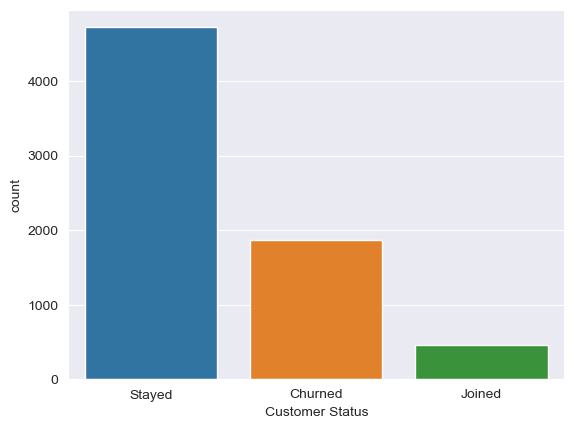

In [16]:
#Vsualize the value count of Target variable Before Resampling
sns.set_style('darkgrid')
sns.countplot(x='Customer Status', data=customers_churn )

This show the relative sizes of these groups, showing a substantial base of existing customers, a smaller but notable segment of churned customers, and a much smaller number of new customers. This might suggest a challenge in attracting new customers or a focus on retention strategies.

Text(0.5, 1.0, 'Customer Status')

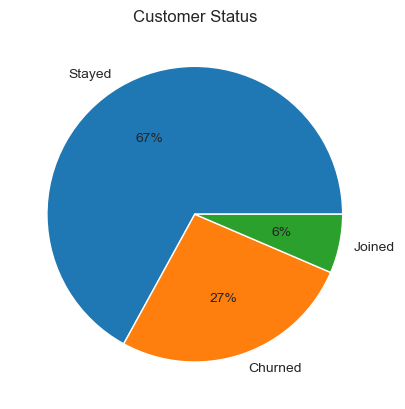

In [17]:
#Display the Target variable after resampling before fit to model
labels = ['Stayed', 'Churned', 'Joined']
values = customers_churn['Customer Status'].value_counts().values
plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Customer Status')

<Axes: xlabel='Customer Status', ylabel='Monthly Charge'>

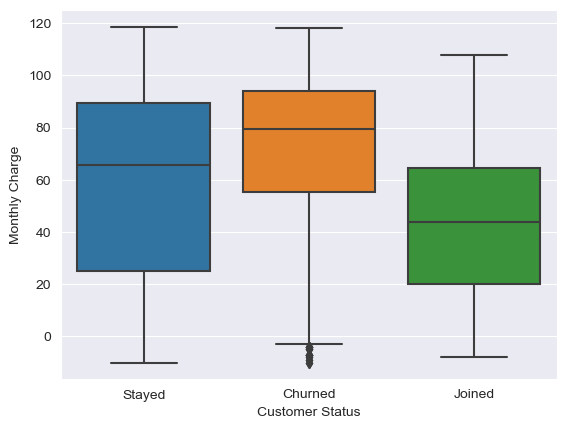

In [18]:
#visualize the relationship and outlier between the target vs monthly charges
sns.boxplot(x='Customer Status',y='Monthly Charge', data=customers_churn )

Stayed: Customers who have stayed with the service tend to have monthly charges distributed around a median of approximately $70, with most customer's charges falling between $55 to $90. There are few outliers on the lower end. Consider offering targeted discounts or loyalty rewards to customers in these tiers to encourage retention.

Churned: Customers who have left the service show a similar median monthly charge to those who stayed, around $70, but with a somewhat tighter interquartile range, suggesting less variation in the monthly charges among churned customers. There is also a noticeable outlier on the lower end, indicating at least one customer had significantly lower charges. consider introducing tiered pricing that increases over time or as service usage increases, which can help transition these customers to higher revenue tiers without a high jump in cost.

Joined: New customers have a median monthly charge close to $65, and their charges  range  between about $50 to $80. This indicates a narrower range of charges compared to existing customers, which could suggest promotional pricing or a specific subscription tier attracting new customers.

Given the broader range of monthly charges and fewer outliers, it might be useful to increase engagement with customers who are paying more to ensure they perceive adequate value for the higher price. Customized upselling of products or services that match their usage patterns can also be considered.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0, 0.5, 'Frequency')

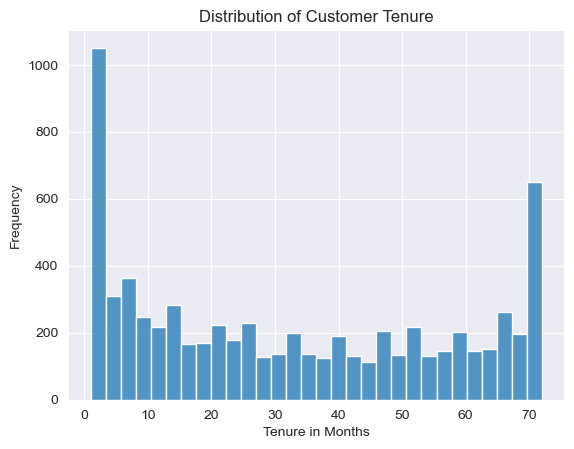

In [19]:
# Univariate Analysis: Plotting the distribution of tenure
sns.histplot(customers_churn['Tenure in Months'], bins=30)
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure in Months')
plt.ylabel('Frequency')

The largest frequency is observed in the very early months (0-10 months), suggesting many customers either leave or are recent additions. Another peak is visible at around 72 months, indicating a cohort of long-term customers. This pattern suggests that if customers stay beyond the initial months, they are likely to remain for an extended period.

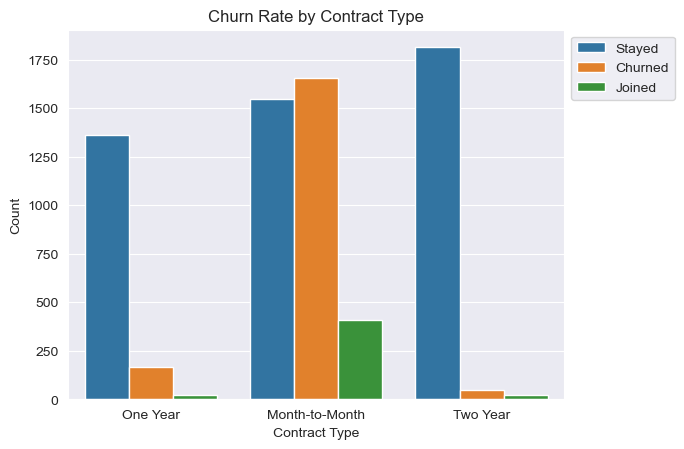

In [20]:
# Bivariate Analysis: Churn rate by contract type
sns.countplot(x='Contract', hue='Customer Status', data=customers_churn)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

The largest frequency is observed in the very early months (0-10 months), suggesting many customers either leave or are recent additions. Another peak is visible at around 72 months, indicating a cohort of long-term customers. This pattern suggests that if customers stay beyond the initial months, they are likely to remain for an extended period.

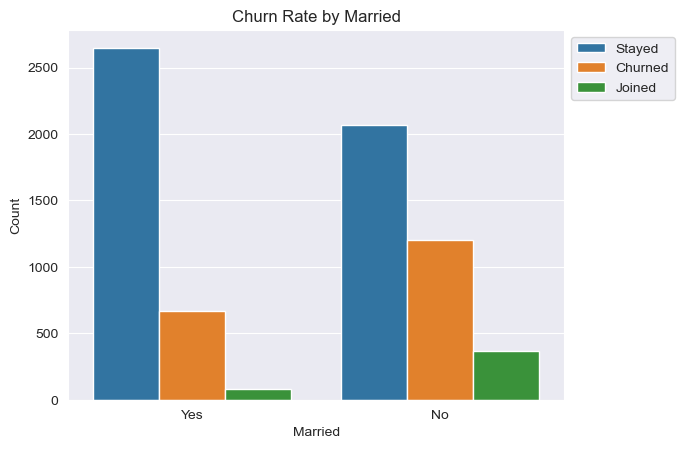

In [21]:
# Bivariate Analysis: Churn rate by married
sns.countplot(x='Married', hue='Customer Status', data=customers_churn)
plt.title('Churn Rate by Married')
plt.xlabel('Married')
plt.ylabel('Count')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Understanding customer behavior 
Based on marital status can provide valuable insights for targeted marketing and customer retention strategies. By segmenting churned, joined, and stayed customers according to marital status, businesses can tailor their approaches to better meet the needs and preferences of each subgroup. For instance, if married customers are more likely to stay with the service, resources and incentives can be allocated towards retaining this demographic. Conversely, if unmarried customers are more prone to churn, efforts can be directed towards understanding and addressing the factors influencing their decision to leave, potentially improving overall customer retention rates.

In [22]:
customers_churn.groupby(['Customer Status'])['Married'].value_counts()

Customer Status  Married
Churned          No         1200
                 Yes         669
Joined           No          370
                 Yes          84
Stayed           Yes        2649
                 No         2071
Name: count, dtype: int64

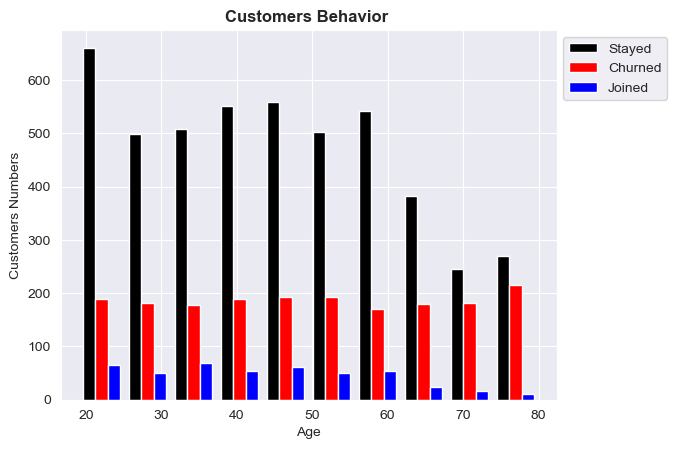

In [23]:
# Visualizing the age based on target value
Customer_Stayed=customers_churn[customers_churn['Customer Status']=='Stayed'].Age
Customer_Churned=customers_churn[customers_churn['Customer Status']=='Churned'].Age
Customer_Joined=customers_churn[customers_churn['Customer Status']=='Joined'].Age
plt.xlabel('Age')
plt.ylabel('Customers Numbers')
plt.hist([Customer_Stayed,Customer_Churned,Customer_Joined], color=['black','red','blue'],label=['Stayed','Churned','Joined'])

plt.title('Customers Behavior ',fontweight ="bold")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

Younger-customers are presumably more prone to churn, according to the chart. Different service expectations compared to older customers, changes in lifestyle, or the pursuit of better discounts could all be the cause of this. Younger-customers' greater incidence of customer-churn may suggest that specific retention tactics are required, such as loyalty plans or tailored offers.

# Plotly Express 
Used to create density heatmaps to visualize the contribution of age and city to total charges and customer status.

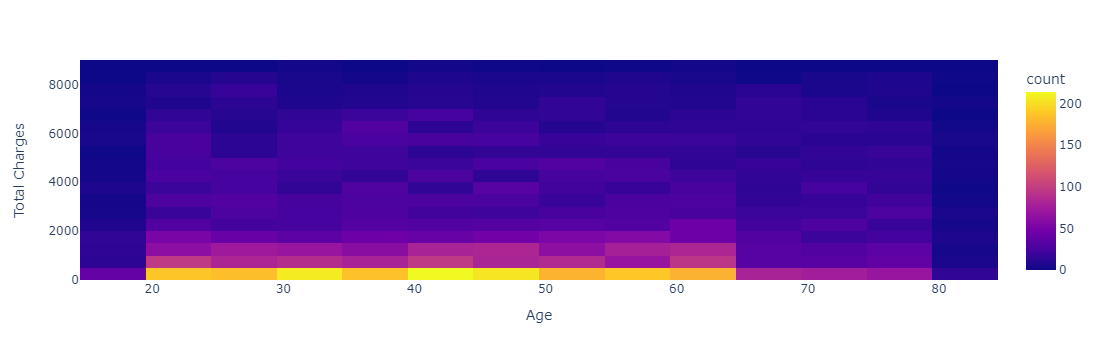

In [24]:
# Visualizing the age contribution against total charges using heatmap
import plotly.express as pp
Age_contribution = pp.density_heatmap(customers_churn, x='Age', y='Total Charges')
Age_contribution

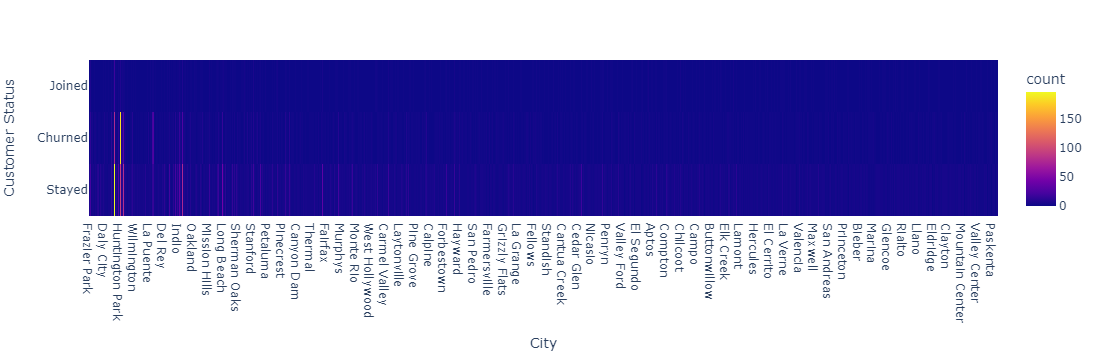

In [25]:
# Visualizing the how different City contribute against target variable using heatmap
City_contribution_status = pp.density_heatmap(customers_churn, x='City', y='Customer Status')
City_contribution_status

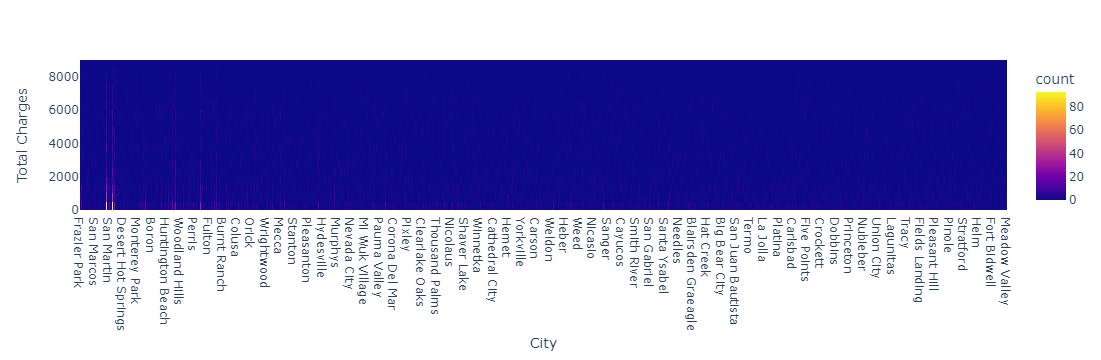

In [26]:
# Visualizing the how different City contribute against Total Charges using heatmap
City_contribution = pp.density_heatmap(customers_churn, x='City', y='Total Charges')
City_contribution

# Handling Missing Values

In [27]:
# Check for missing values in each column and return the value
missing_value = customers_churn.isnull().sum()
missing_value

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                   

In [28]:
# check all the features in the dataset
customers_churn.columns

Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'City', 'Zip Code',
       'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months',
       'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Customer Status',
       'Churn Category', 'Churn Reason'],
      dtype='object')

# General Visualization

In [29]:
# Gather other features that have not been tested against Target class
other_features = ['Number of Referrals', 'Tenure in Months',
       'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges',
       'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue',
       'Churn Category']

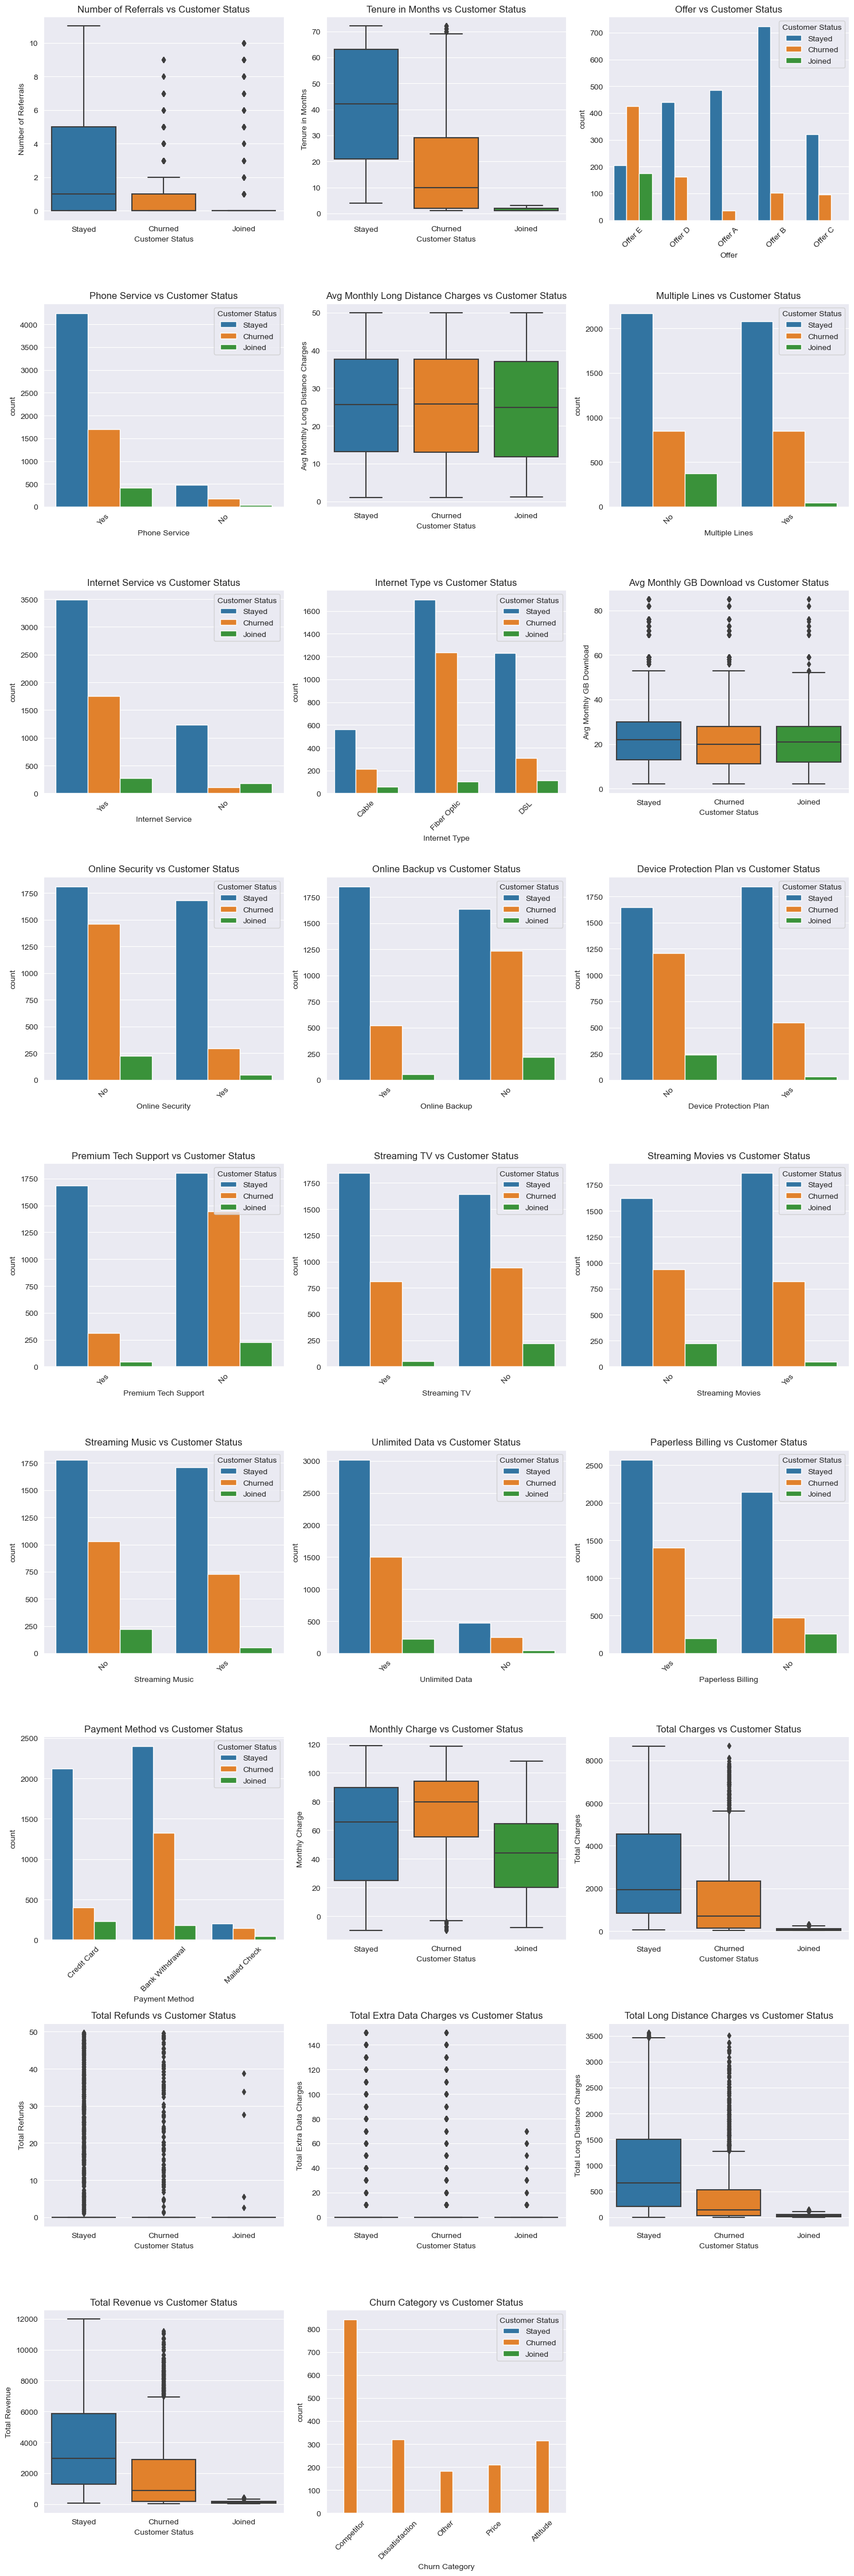

In [30]:
# Visualize other features Vs Target class
import math

# Determine the number of rows and columns for the subplot grid
num_features = len(other_features)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

# Set up the plotting grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Iterate over each feature and create plots
for i, feature in enumerate(other_features):
    row = i // num_cols
    col = i % num_cols
    
    # Bar plot for categorical feature
    if customers_churn[feature].dtype == 'object':
        sns.countplot(x=feature, hue='Customer Status', data=customers_churn, ax=axes[row, col])
        axes[row, col].set_title(f'{feature} vs Customer Status')
        axes[row, col].tick_params(axis='x', rotation=45)
    
    # Box plot for numerical feature
    else:
        sns.boxplot(x='Customer Status', y=feature, data=customers_churn, ax=axes[row, col])
        axes[row, col].set_title(f'{feature} vs Customer Status')

# Hide empty subplots
if num_features < num_rows * num_cols:
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()

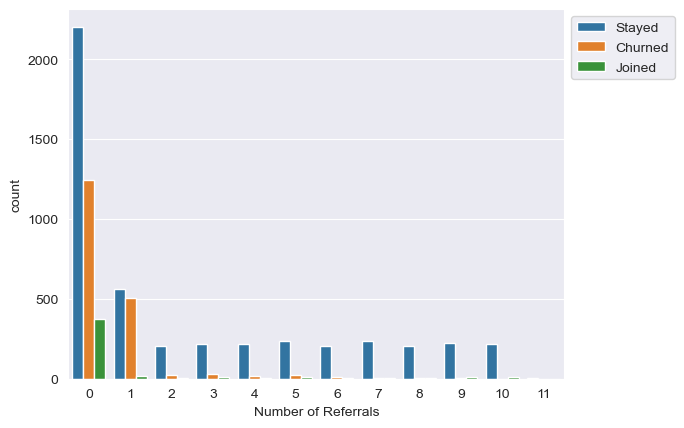

In [31]:
sns.countplot(x='Number of Referrals', hue='Customer Status', data=customers_churn)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [32]:
# Checking the customer against phone service
customers_churn.groupby(['Customer Status'])['Phone Service'].value_counts()

Customer Status  Phone Service
Churned          Yes              1699
                 No                170
Joined           Yes               416
                 No                 38
Stayed           Yes              4246
                 No                474
Name: count, dtype: int64

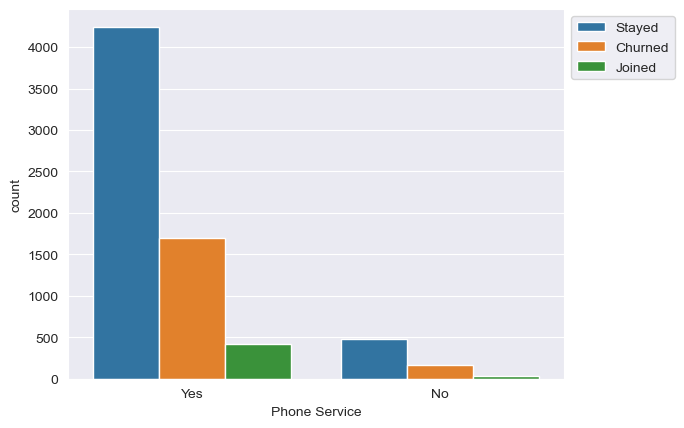

In [33]:
#visualise the phone vs customer status
sns.countplot(x='Phone Service', hue='Customer Status', data=customers_churn)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

By correlating churned, joined, and stayed customers with their phone service subscription status, businesses gain insights into the impact of this service on customer retention. For instance, if customers without phone service are more likely to churn, it might indicate the importance of offering or improving this service to enhance customer satisfaction and reduce churn rates. Additionally, understanding the preferences and behaviors of customers with and without phone service enables businesses to tailor communication channels and support services accordingly, potentially improving overall customer satisfaction and loyalty.

<Axes: xlabel='Customer Status', ylabel='Total Revenue'>

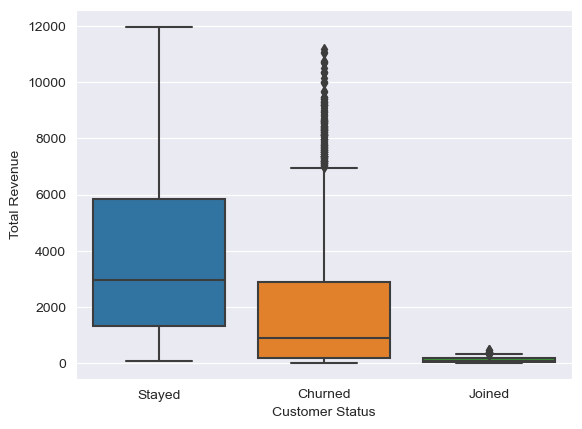

In [34]:
# visualise the customer against toltal revenue
sns.boxplot(x='Customer Status', y='Total Revenue', data=customers_churn)

<Axes: xlabel='Tenure in Months', ylabel='Monthly Charge'>

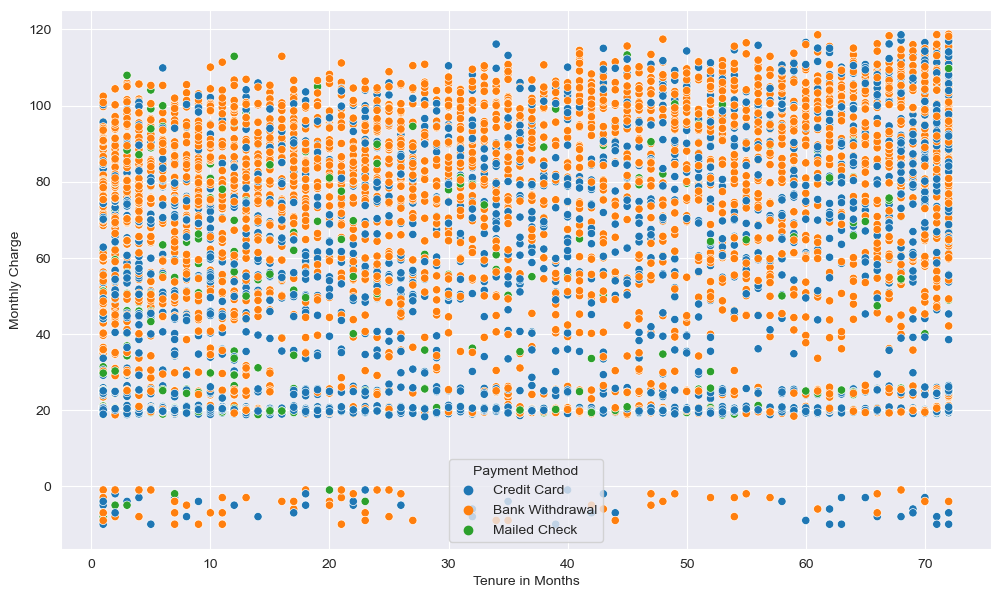

In [35]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Tenure in Months',y='Monthly Charge',data=customers_churn,hue='Payment Method')

In [36]:
# Create a categorical Columns 
categorical_columns = customers_churn.select_dtypes(include = object).columns
categorical_columns

Index(['Gender', 'Married', 'City', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Customer Status',
       'Churn Category', 'Churn Reason'],
      dtype='object')

In [37]:
# Create a Numerical Columns
numerical_columns = customers_churn.select_dtypes(include = "number").columns
numerical_columns

Index(['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude',
       'Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [38]:
# Addressing missing values for categorical fields with a clear indication of no service
no_internet_service_columns = [
    "Internet Type", "Online Security", "Online Backup", "Device Protection Plan",
    "Premium Tech Support", "Streaming TV", "Streaming Movies", "Streaming Music", "Unlimited Data"
]

In [39]:
# Replace missing values in these columns with 'No Internet Service'
for column in no_internet_service_columns:
    customers_churn[column].fillna('No Internet Service',inplace=True)

In [40]:
# For 'Avg Monthly Long-Distance Charges', impute missing values with the median of the column
avg_long_distance_median = customers_churn['Avg Monthly Long Distance Charges'].median()
customers_churn['Avg Monthly Long Distance Charges'].fillna(avg_long_distance_median, inplace=True)

In [41]:
# label the target value into number
customers_churn['Customer Status'] = customers_churn['Customer Status'].replace({'Stayed': 0, 'Churned': 1, 'Joined': 2})

# Normalization

In [42]:
# Import labelEncoder to covert categorical value to numerical value
# the standardscaler to normalizing dataset
# Knnimputer to address the missing values
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer

In [43]:
# Filling the missing value and encode the columns
le = preprocessing.LabelEncoder()
for cat_colmn in categorical_columns:
    customers_churn[cat_colmn] = le.fit_transform(customers_churn[cat_colmn])

Text(222.72222222222223, 0.5, 'Rows')

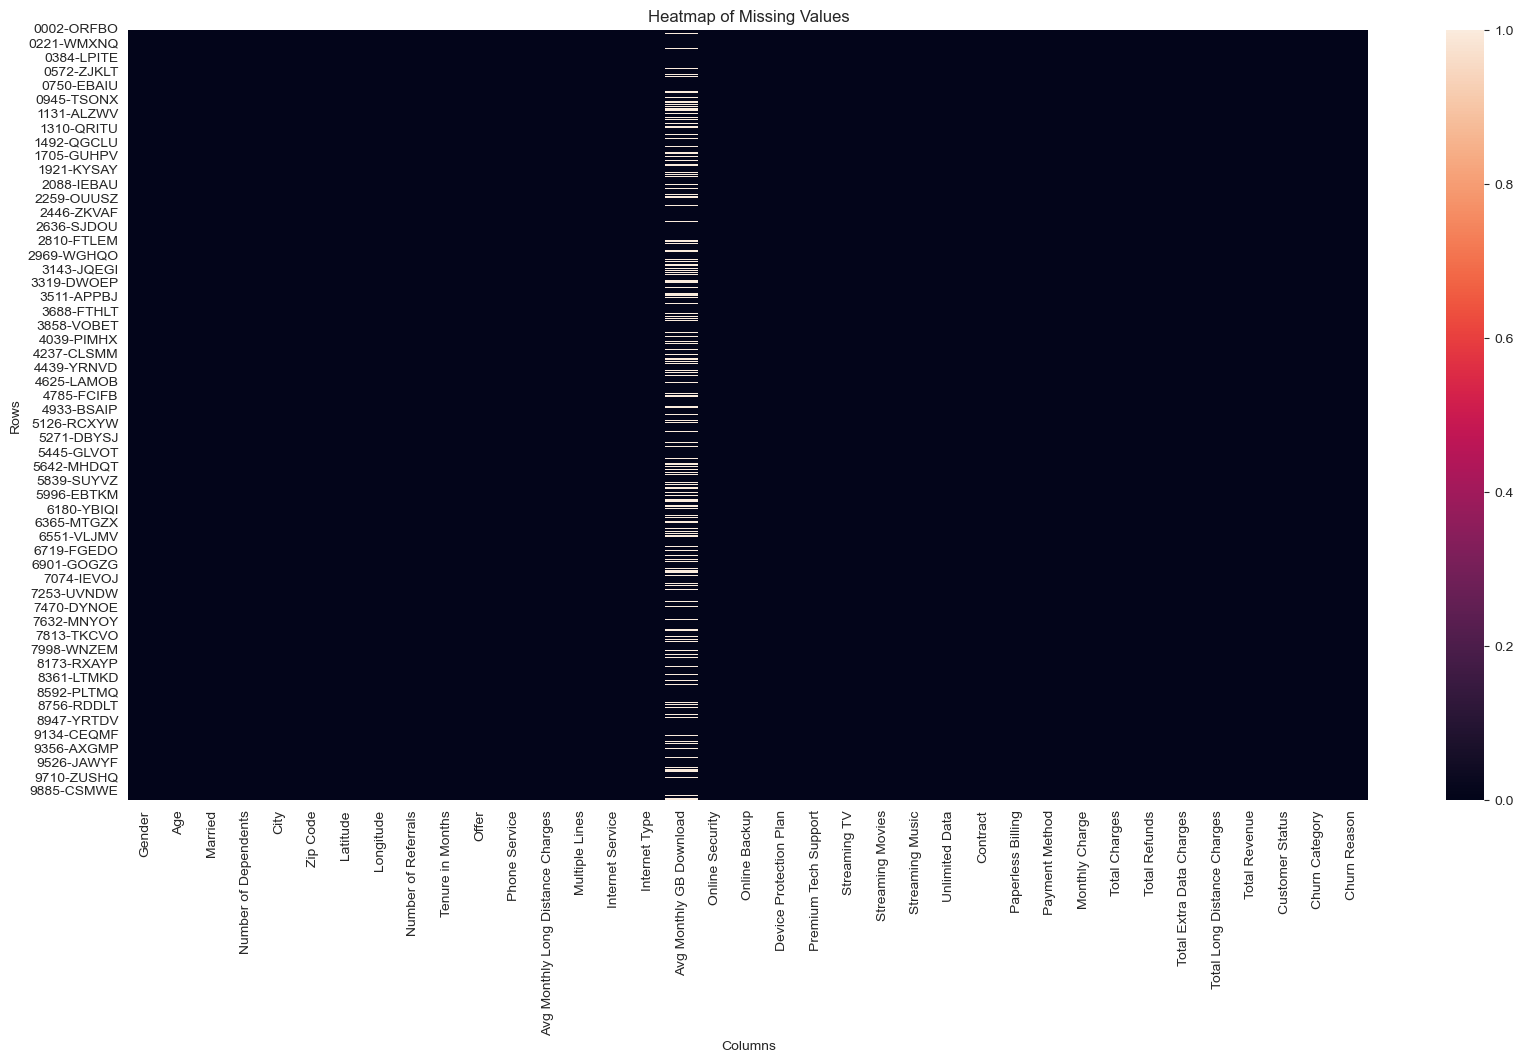

In [44]:
# Visualize the missing values as a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(customers_churn.isnull())
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')

This shows there is still a missing value in Avg Monthly GB Download that need to be address

In [45]:
#Check missing value and return the value
miss_value = customers_churn.isnull().sum()
miss_value

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download              1526
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                   

In [46]:
#checking the volume of the value of each features 
features_churn = customers_churn.columns
for feature in features_churn:
     print(f'{feature}--->{customers_churn[feature].nunique()}')

Gender--->2
Age--->62
Married--->2
Number of Dependents--->10
City--->1106
Zip Code--->1626
Latitude--->1626
Longitude--->1625
Number of Referrals--->12
Tenure in Months--->72
Offer--->6
Phone Service--->2
Avg Monthly Long Distance Charges--->3583
Multiple Lines--->3
Internet Service--->2
Internet Type--->4
Avg Monthly GB Download--->49
Online Security--->3
Online Backup--->3
Device Protection Plan--->3
Premium Tech Support--->3
Streaming TV--->3
Streaming Movies--->3
Streaming Music--->3
Unlimited Data--->3
Contract--->3
Paperless Billing--->2
Payment Method--->3
Monthly Charge--->1591
Total Charges--->6540
Total Refunds--->500
Total Extra Data Charges--->16
Total Long Distance Charges--->6068
Total Revenue--->6975
Customer Status--->3
Churn Category--->6
Churn Reason--->21


In [47]:
# using KNNImputer to fill up remaining missing value
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(customers_churn)
imputed_data = np.round(imputed_data)
# Create a new table from the old so the handlinng of missing value will reflect
customer_churn_imputed = pd.DataFrame(data=imputed_data, columns=customers_churn.columns)

In [48]:
#check the missing value again
customer_churn_imputed.isnull().sum()

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                 

Text(222.72222222222223, 0.5, 'Rows')

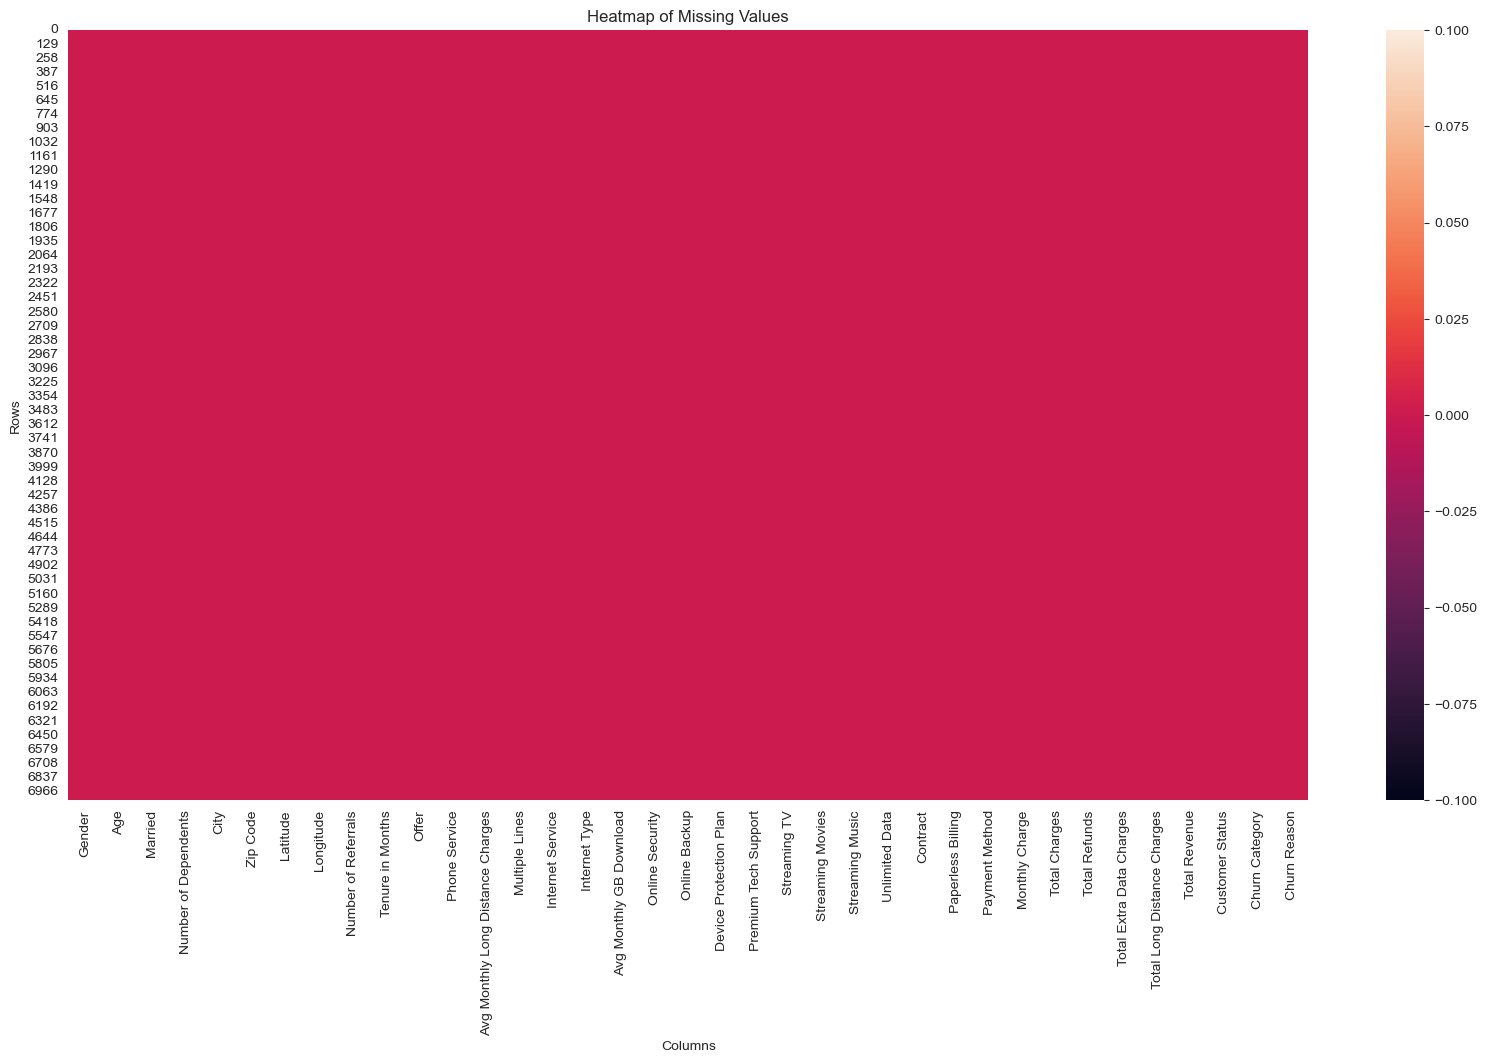

In [49]:
# Visualize the missing values as a heatmap to confirm there is no missing value again
plt.figure(figsize=(20, 10))
sns.heatmap(customer_churn_imputed.isnull())
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')

<Axes: >

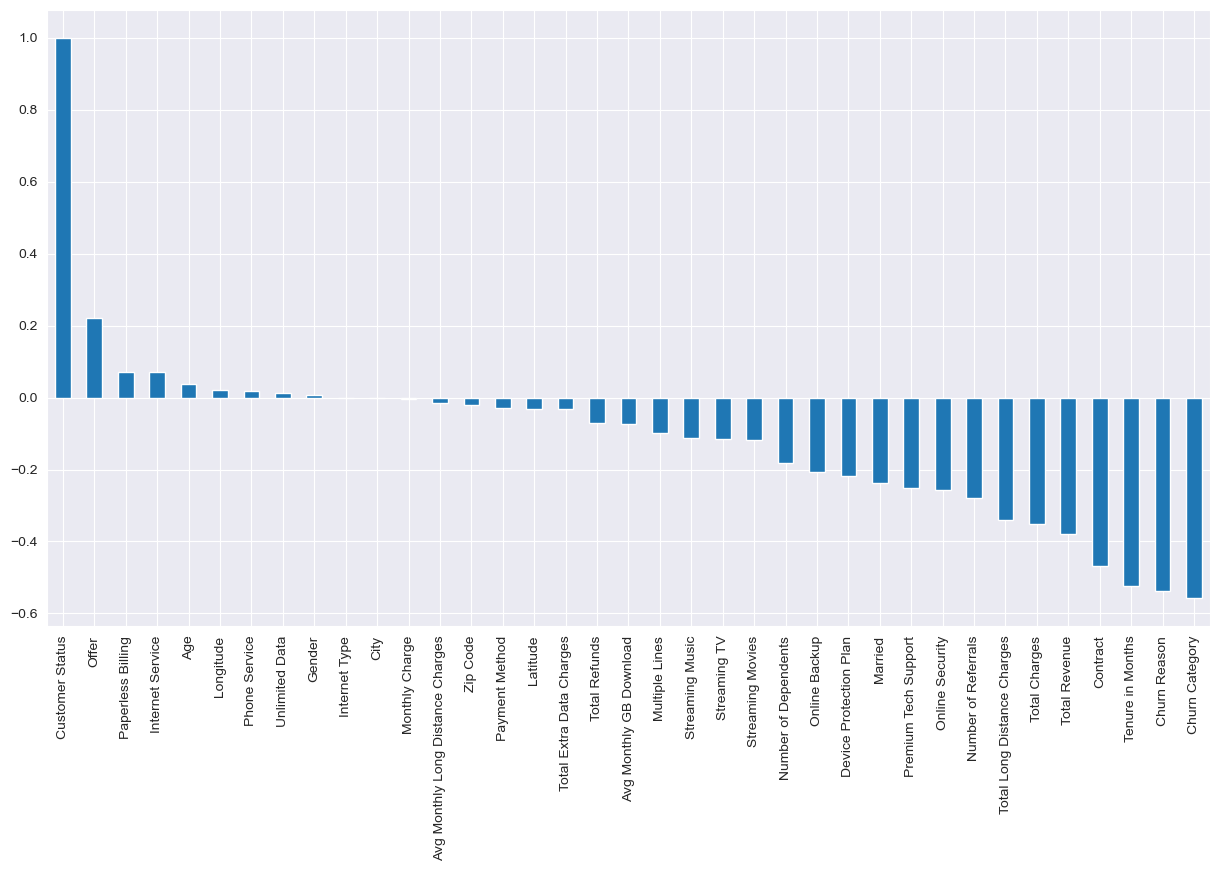

In [50]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
customer_churn_imputed.corr()['Customer Status'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

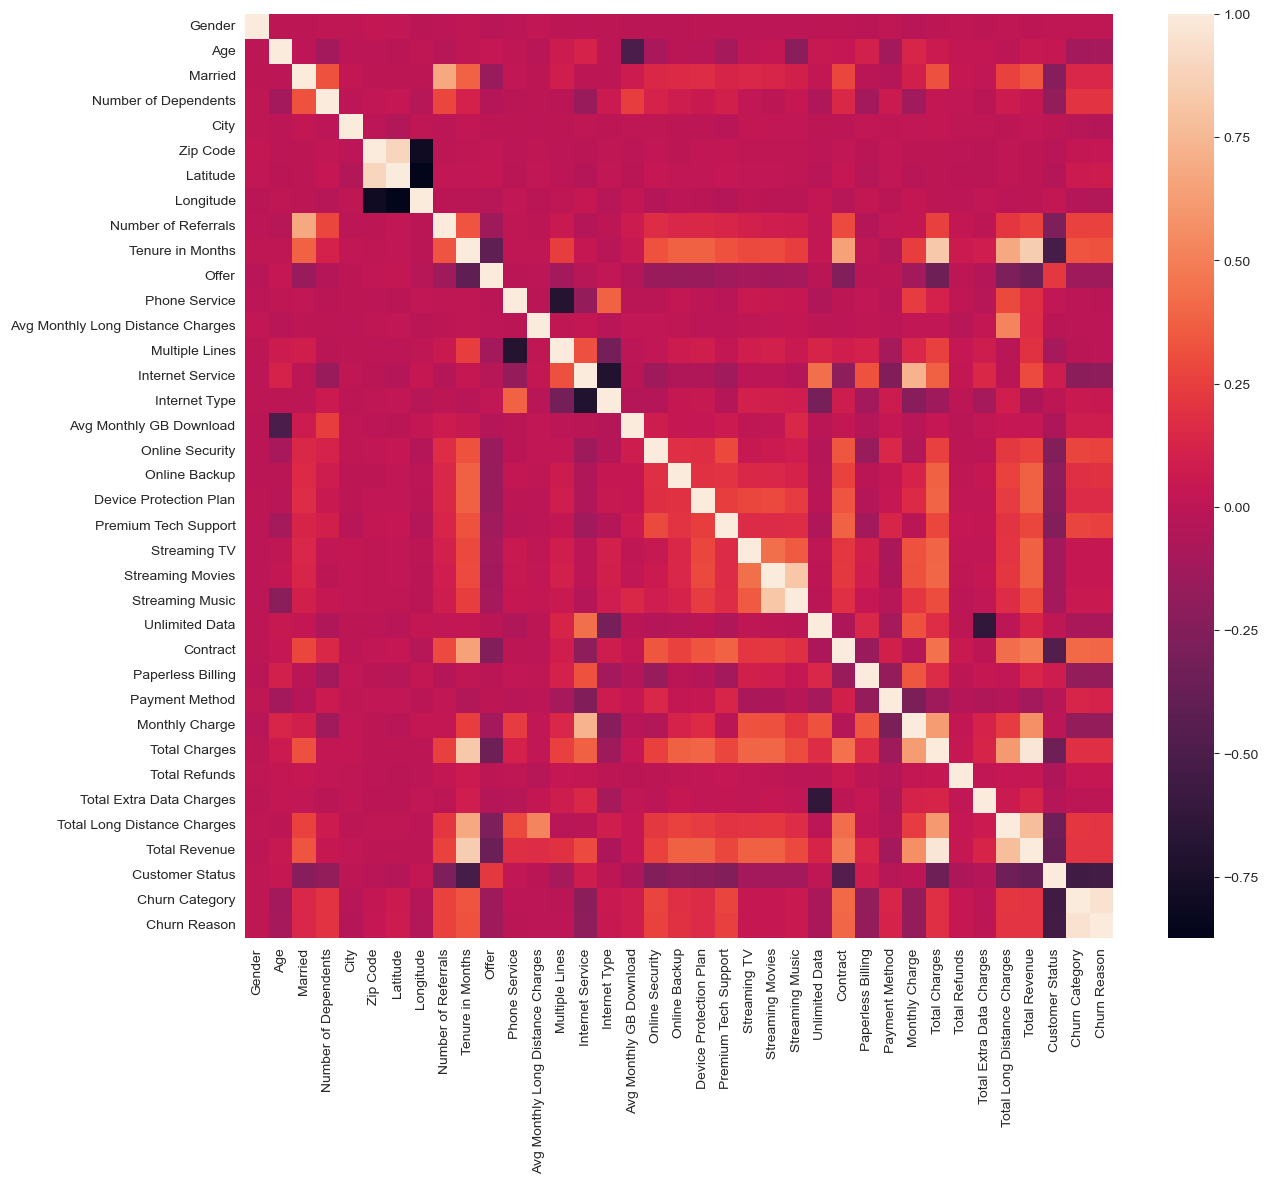

In [51]:
#heat map
plt.figure(figsize=(14,12))
sns.heatmap(customer_churn_imputed.corr())

In [52]:
#Droping some features that are not important in the predition
to_drop = ['Churn Reason','Churn Category', 'City', 'Zip Code']
customer_churn_imputed.drop(columns=to_drop,inplace=True)

In [53]:
#checking whether the features has been removed
customer_churn_imputed.head()

Gender   Age  Married  Number of Dependents  Latitude  Longitude  \
0     0.0  37.0      1.0                   0.0      35.0     -119.0   
1     1.0  46.0      0.0                   0.0      34.0     -118.0   
2     1.0  50.0      0.0                   0.0      34.0     -118.0   
3     1.0  78.0      1.0                   0.0      38.0     -122.0   
4     0.0  75.0      1.0                   0.0      34.0     -119.0   

   Number of Referrals  Tenure in Months  Offer  Phone Service  ...  Contract  \
0                  2.0               9.0    5.0            1.0  ...       1.0   
1                  0.0               9.0    5.0            1.0  ...       0.0   
2                  0.0               4.0    4.0            1.0  ...       0.0   
3                  1.0              13.0    3.0            1.0  ...       0.0   
4                  3.0               3.0    5.0            1.0  ...       0.0   

   Paperless Billing  Payment Method  Monthly Charge  Total Charges  \
0                1.0             1.0            66.0          593.0   
1                0.0             1.0            -4.0          542.0   
2                1.0             0.0            74.0          281.0   
3                1.0             0.0            98.0         1238.0   
4                1.0             1.0            84.0          267.0   

   Total Refunds  Total Extra Data Charges  Total Long Distance Charges  \
0            0.0                       0.0                        382.0   
1           38.0                      10.0                         96.0   
2            0.0                       0.0                        135.0   
3            0.0                       0.0                        362.0   
4            0.0                       0.0                         22.0   

   Total Revenue  Customer Status  
0          975.0              0.0  
1          610.0              0.0  
2          415.0              1.0  
3         1600.0              1.0  
4          290.0              1.0  

[5 rows x 33 columns]

In [54]:
churn_column=customer_churn_imputed.columns

In [55]:
#Separating the target variable from other features
X = customer_churn_imputed.drop('Customer Status',axis=1)
y = customer_churn_imputed['Customer Status']

# Standardization
Standardizing features can significantly improve the performance of certain models, such as those based on distance metrics (e.g., K-Nearest Neighbors, Support Vector Machines) or gradient descent optimization (e.g., Logistic Regression, Neural Networks). These models are sensitive to the scale of the features, and standardization helps them converge faster and produce more accurate results.
Standardizing features does not affect the relationship between features and the target variable. It simply rescales and centers the features for better model performance. Therefore, the interpretation of the model coefficients or feature importance remains unchanged after standardization.

In [56]:
# Standardize features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
#import resampling library
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [58]:
# initializing under and over sampling
churn_under = RandomUnderSampler(random_state=42)
churn_over = SMOTE(random_state=42)

In [59]:
# under sampling of X, y 
churn_under.fit_resample(X_scaled,y)
# over sampling of X, y
X_churn, y_churn = churn_over.fit_resample(X_scaled,y)

In [60]:
# Check standardize data
print(X_churn)

[[-1.00955867 -0.56777322  1.03453023 ... -0.27330037 -0.43360999
  -0.71880758]
 [ 0.99053183 -0.03043292 -0.96662231 ...  0.12505528 -0.77142933
  -0.84620731]
 [ 0.99053183  0.20838499 -0.96662231 ... -0.27330037 -0.72536306
  -0.91427017]
 ...
 [ 0.99053183 -1.37875964  0.22851374 ... -0.27330037 -0.84243182
  -1.03511574]
 [ 0.99053183 -0.69582912 -0.96662231 ... -0.27330037 -0.84758124
  -1.03574103]
 [-1.00955867  0.56050512 -0.96662231 ... -0.27330037 -0.8808703
  -1.04862297]]


# Splitting the dataset to Training and Testing

In [61]:
#import libraries to split dataset to train and test
from sklearn.model_selection import train_test_split

In [62]:
#splitting it accordingly
X_train, X_test, y_train, y_test = train_test_split(X_churn, y_churn, test_size = 0.2, random_state = 42)

# Visualisation of the Target Variable before Prediction

[Text(0.5, 1.0, 'After Resampling distribution')]

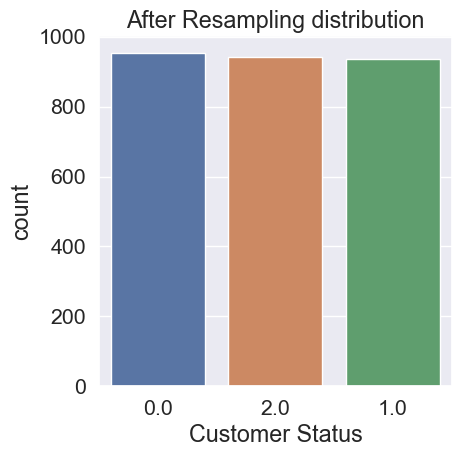

In [63]:
#Display data after resampling
plt.figure(figsize = (10, 10))
sns.set(font_scale=1.4)
plt.subplot(222)
sns.countplot(y_test, x=y_test, order =y_test.value_counts().index).set(title='After Resampling distribution')

Text(0.5, 1.0, 'Customer Status after resampling before fit in models')

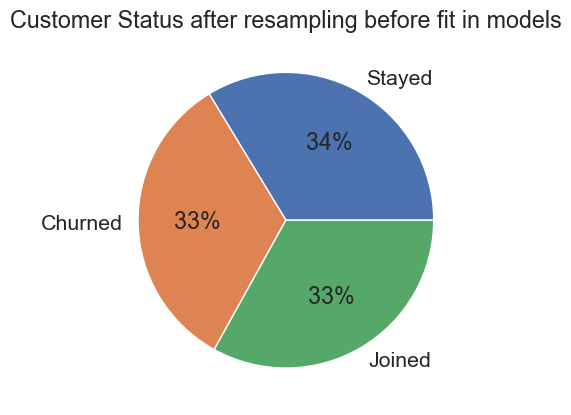

In [64]:
#Display the Target variable after resampling before fit to model
labels = ['Stayed', 'Churned', 'Joined']
values = y_test.value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Customer Status after resampling before fit in models')

In [65]:
#create a table for x_test
X_test = pd.DataFrame(X_test, columns=X.columns)

In [66]:
#A table for x_train 
X_train = pd.DataFrame(X_train, columns=X.columns)

# Importation of Libraries For Models
We import Anova(selectBest) to select best features that are mostly determine the customer status, also gridsearchcv for hypertuned for the models parametered selected. We also import all selected models libraries and the metrics to use for comparing the models  

In [67]:
#Import necessary libraries
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

# ANOVA (feature selection) For Features Important and GridSearchCV For Hypertuned

In [68]:
# Defining a function to create a pipeline with feature selection and a classifier
def make_classifier_pipeline(classifier, param_grid=None):
    pipeline = Pipeline([
        ('feature_selection', SelectKBest(score_func=f_classif)),
        ('classifier', classifier)
    ])
    if param_grid:
        return GridSearchCV(pipeline, param_grid, cv=5)
    return pipeline

# Hyperparameters for GridSearchCV
rf_params = {
    'classifier__n_estimators': [50, 100, 200], 
    'classifier__max_depth': [None, 10, 20], 
    'classifier__min_samples_split': [2, 5, 10], 
    'feature_selection__k': [10, 20]
}
svc_params = {
    'classifier__C': [0.1, 1.0, 10.0], 
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
    'classifier__gamma': ['scale', 'auto'], 
    'feature_selection__k': [10, 20]
}
lr_params = {
    'classifier__C': [0.1, 1, 10],  
    'feature_selection__k': [10, 20]
}
kn_params = {
    'classifier__n_neighbors': [3, 5, 7], 
    'classifier__weights': ['uniform', 'distance'], 
    'feature_selection__k': [10, 20]
}
dt_params = {
    'classifier__max_depth': [3, 5, 10], 
    'classifier__min_samples_split': [2, 5, 10], 
    'feature_selection__k': [10, 20]
}
gn_params = {
    'feature_selection__k': [10, 20]}

xg_params = {
    'classifier__n_estimators': [50, 100, 200], 
    'classifier__max_depth': [3, 5, 7], 
    'classifier__learning_rate': [0.01, 0.1], 
    'feature_selection__k': [10, 20]
}

In [69]:
# Create pipelines with GridSearchCV
pipelines = {
    'Random Forest': make_classifier_pipeline(RandomForestClassifier(), rf_params),
    'Support Vector Machine': make_classifier_pipeline(SVC(), svc_params),
    'Logistic Regression': make_classifier_pipeline(LogisticRegression(max_iter=1000), lr_params),
    'K-Nearest Neighbors': make_classifier_pipeline(KNeighborsClassifier(), kn_params),
    'Naive Bayes (Gaussian)': make_classifier_pipeline(GaussianNB(), gn_params),
    'Decision Tree': make_classifier_pipeline(DecisionTreeClassifier(), dt_params),
    'XGBoost': make_classifier_pipeline(XGBClassifier(), xg_params)
}

# Model Evaluation

In [70]:
# Function to evaluate each classifier
def evaluate_classifier(pipe, X_train, X_test, y_train, y_test):
    if isinstance(pipe, GridSearchCV):
        pipe.fit(X_train, y_train)
        print("Best parameters:", pipe.best_params_)
    else:
        pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    positive_rate = sum(y_pred) / len(y_pred)  # Positive rate
    class_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, positive_rate, class_rep, conf_matrix, y_pred

# Result for each Model and VIsualisation of the Result

In [71]:
# Evaluate each classifier and visualize results
results = {}
predictions = {}
for name, pipeline in pipelines.items():
    print(f"Evaluating {name}...")
    accuracy, precision, recall, f1, positive_rate, class_rep, conf_matrix, y_pred = evaluate_classifier(pipeline, X_train, X_test, y_train, y_test)
    results[name] = {'Accuracy': accuracy,
                     'Precision': precision,
                     'Recall': recall,
                     'F1 Score': f1,
                     'Positive Rate': positive_rate,
                     'Classification Report': class_rep,
                     'Confusion Matrix': conf_matrix}
    predictions[name] = y_pred

Evaluating Random Forest...
Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200, 'feature_selection__k': 20}
Evaluating Support Vector Machine...
Best parameters: {'classifier__C': 10.0, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf', 'feature_selection__k': 20}
Evaluating Logistic Regression...
Best parameters: {'classifier__C': 10, 'feature_selection__k': 20}
Evaluating K-Nearest Neighbors...
Best parameters: {'classifier__n_neighbors': 3, 'classifier__weights': 'distance', 'feature_selection__k': 20}
Evaluating Naive Bayes (Gaussian)...
Best parameters: {'feature_selection__k': 20}
Evaluating Decision Tree...
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'feature_selection__k': 20}
Evaluating XGBoost...
Best parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 200, 'feature_selection__k': 20}



Classifier: Random Forest
Evaluation Metrics:
Accuracy: 0.9046610169491526
Precision: 0.9037571155167337
Recall: 0.9046610169491526
F1 Score: 0.9038608605478085
Positive Rate: 1.0049435028248588
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.91       954
         1.0       0.88      0.83      0.85       936
         2.0       0.94      0.97      0.95       942

    accuracy                           0.90      2832
   macro avg       0.90      0.90      0.90      2832
weighted avg       0.90      0.90      0.90      2832

Confusion Matrix:
[[869  85   0]
 [ 97 776  63]
 [  0  25 917]]
Predicted Target Variables: [1. 0. 0. ... 1. 2. 1.]


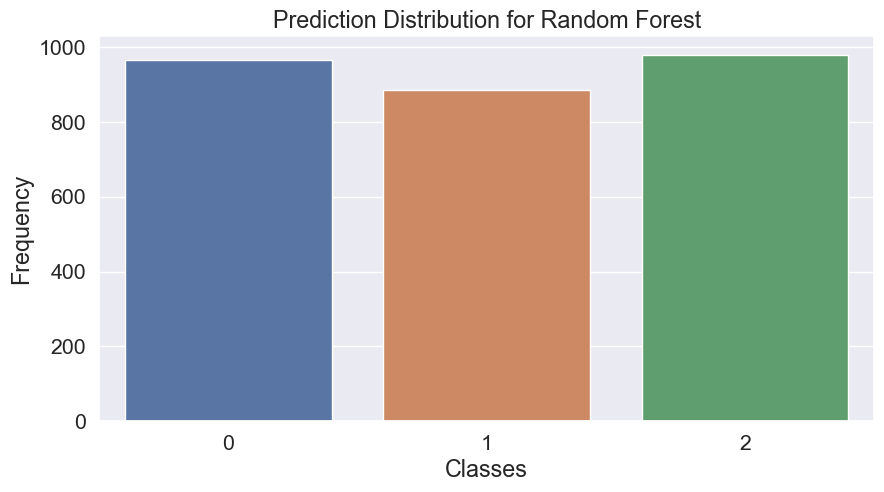


Classifier: Support Vector Machine
Evaluation Metrics:
Accuracy: 0.8584039548022598
Precision: 0.8597508520917044
Recall: 0.8584039548022598
F1 Score: 0.8579914916116843
Positive Rate: 1.051553672316384
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86       954
         1.0       0.79      0.80      0.80       936
         2.0       0.88      0.95      0.91       942

    accuracy                           0.86      2832
   macro avg       0.86      0.86      0.86      2832
weighted avg       0.86      0.86      0.86      2832

Confusion Matrix:
[[787 150  17]
 [ 80 752 104]
 [  0  50 892]]
Predicted Target Variables: [1. 0. 0. ... 1. 2. 1.]


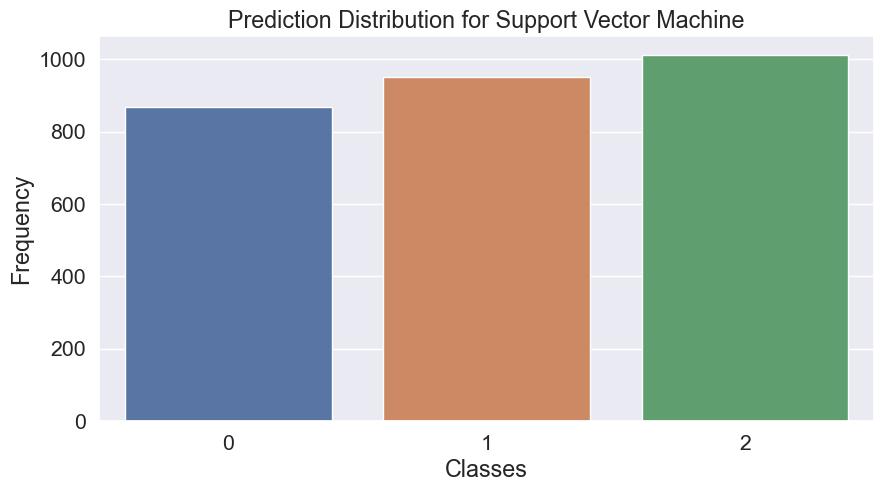


Classifier: Logistic Regression
Evaluation Metrics:
Accuracy: 0.7948446327683616
Precision: 0.7956537502785003
Recall: 0.7948446327683616
F1 Score: 0.7936116672323152
Positive Rate: 1.0674435028248588
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.79      0.83       954
         1.0       0.70      0.69      0.69       936
         2.0       0.81      0.91      0.86       942

    accuracy                           0.79      2832
   macro avg       0.80      0.79      0.79      2832
weighted avg       0.80      0.79      0.79      2832

Confusion Matrix:
[[750 188  16]
 [114 642 180]
 [  0  83 859]]
Predicted Target Variables: [2. 0. 0. ... 1. 2. 1.]


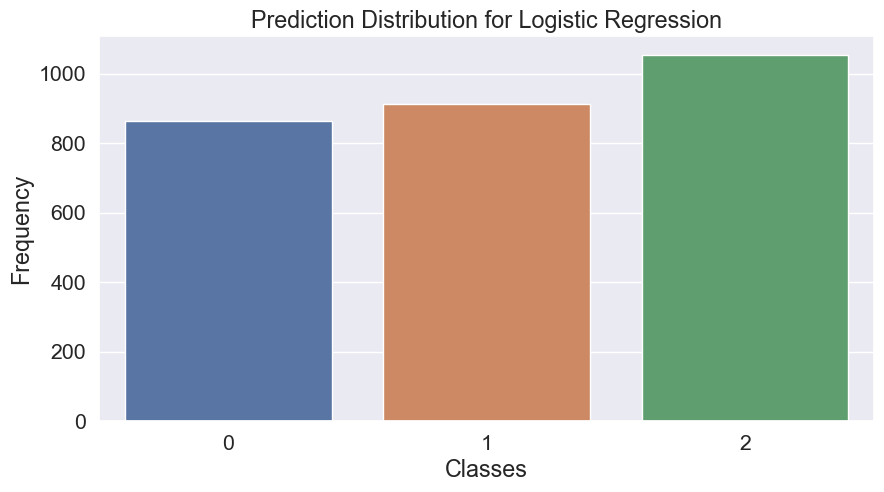


Classifier: K-Nearest Neighbors
Evaluation Metrics:
Accuracy: 0.842867231638418
Precision: 0.8502930682491772
Recall: 0.842867231638418
F1 Score: 0.8415998715354038
Positive Rate: 1.0956920903954803
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.73      0.81       954
         1.0       0.76      0.85      0.80       936
         2.0       0.87      0.95      0.91       942

    accuracy                           0.84      2832
   macro avg       0.85      0.84      0.84      2832
weighted avg       0.85      0.84      0.84      2832

Confusion Matrix:
[[697 201  56]
 [ 60 796  80]
 [  2  46 894]]
Predicted Target Variables: [1. 0. 0. ... 1. 2. 1.]


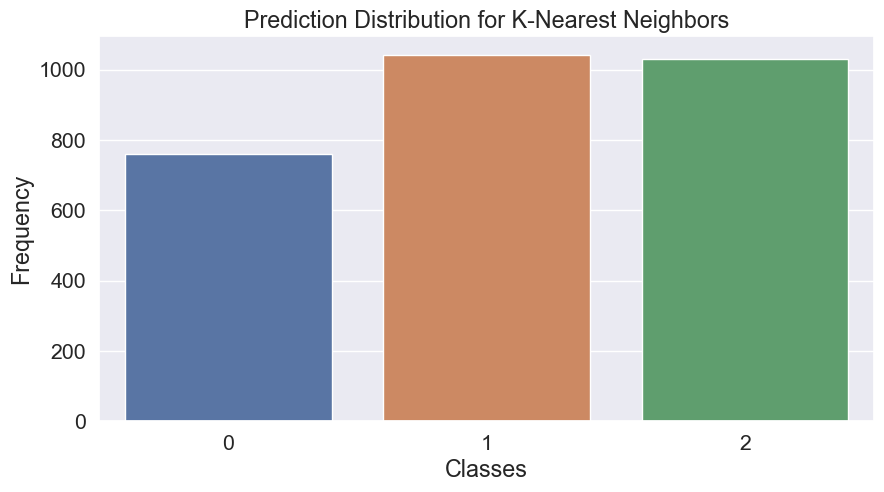


Classifier: Naive Bayes (Gaussian)
Evaluation Metrics:
Accuracy: 0.7786016949152542
Precision: 0.7772375954341919
Recall: 0.7786016949152542
F1 Score: 0.7698762104635183
Positive Rate: 1.1101694915254237
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.79      0.81       954
         1.0       0.73      0.56      0.63       936
         2.0       0.76      0.98      0.86       942

    accuracy                           0.78      2832
   macro avg       0.78      0.78      0.77      2832
weighted avg       0.78      0.78      0.77      2832

Confusion Matrix:
[[753 184  17]
 [141 528 267]
 [  2  16 924]]
Predicted Target Variables: [2. 0. 1. ... 2. 2. 1.]


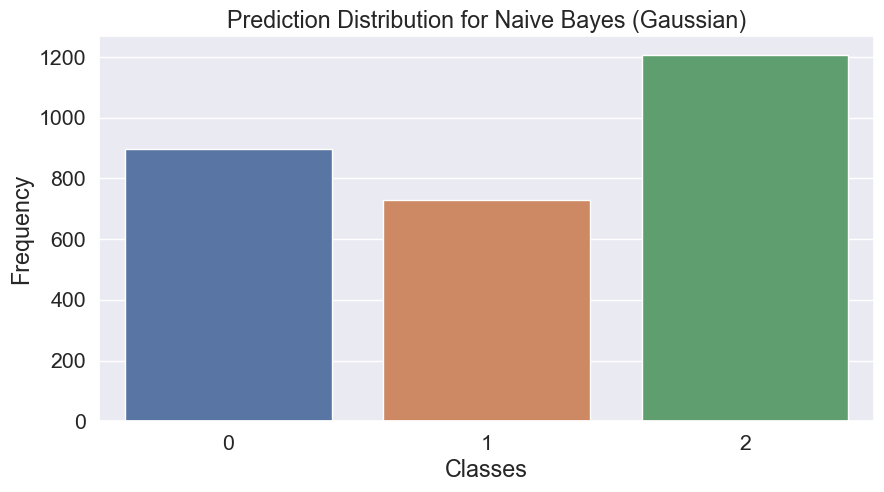


Classifier: Decision Tree
Evaluation Metrics:
Accuracy: 0.847457627118644
Precision: 0.8448614060217634
Recall: 0.847457627118644
F1 Score: 0.8450565854438491
Positive Rate: 1.0197740112994351
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86       954
         1.0       0.80      0.72      0.76       936
         2.0       0.88      0.96      0.92       942

    accuracy                           0.85      2832
   macro avg       0.84      0.85      0.84      2832
weighted avg       0.84      0.85      0.85      2832

Confusion Matrix:
[[822 132   0]
 [142 676 118]
 [  0  40 902]]
Predicted Target Variables: [1. 0. 0. ... 2. 2. 0.]


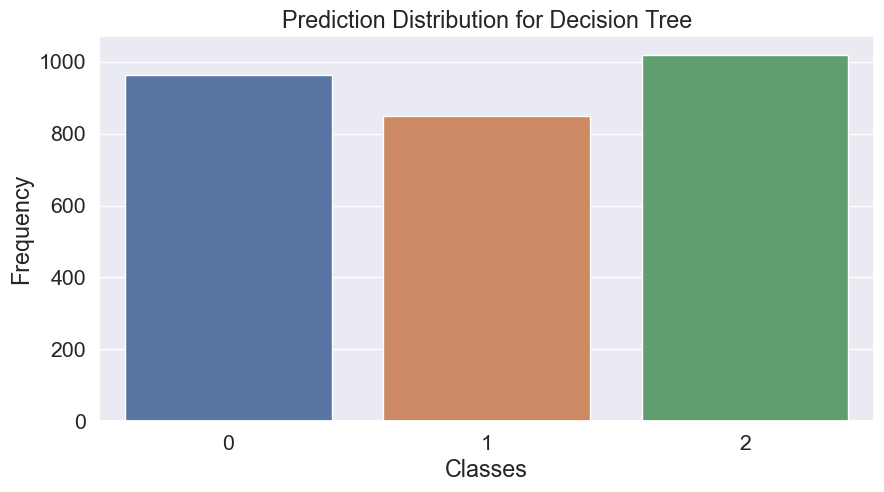


Classifier: XGBoost
Evaluation Metrics:
Accuracy: 0.8975988700564972
Precision: 0.8965471803134889
Recall: 0.8975988700564972
F1 Score: 0.896689691927249
Positive Rate: 1.0098870056497176
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90       954
         1.0       0.86      0.82      0.84       936
         2.0       0.93      0.97      0.95       942

    accuracy                           0.90      2832
   macro avg       0.90      0.90      0.90      2832
weighted avg       0.90      0.90      0.90      2832

Confusion Matrix:
[[861  93   0]
 [ 98 766  72]
 [  0  27 915]]
Predicted Target Variables: [1 0 0 ... 1 2 0]


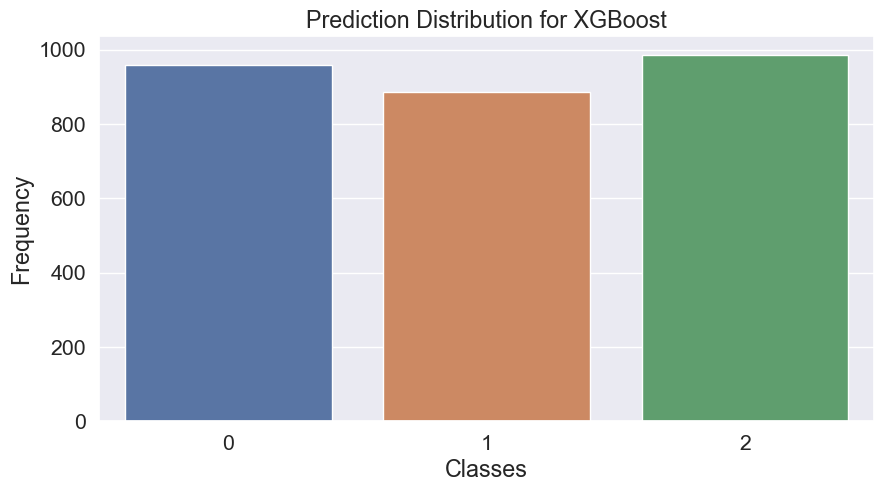

In [72]:
# Display results and predictions
for name, result in results.items():
    print(f"\nClassifier: {name}")
    print("Evaluation Metrics:")
    print("Accuracy:", result['Accuracy'])
    print("Precision:", result['Precision'])
    print("Recall:", result['Recall'])
    print("F1 Score:", result['F1 Score'])
    print("Positive Rate:", result['Positive Rate'])
    print("Classification Report:")
    print(result['Classification Report'])
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print("Predicted Target Variables:", predictions[name])
    
    # Convert predictions to a pandas series
    y_pred_series = pd.Series(predictions[name], name="Predicted")

    all_classes = [0, 1, 2]  # these are all expected classes
    
    # Visualize the prediction distribution
    plt.figure(figsize=(10, 5))
    sns.countplot(x=y_pred_series, order=all_classes)
    plt.title(f'Prediction Distribution for {name}')
    plt.xlabel('Classes')
    plt.ylabel('Frequency')

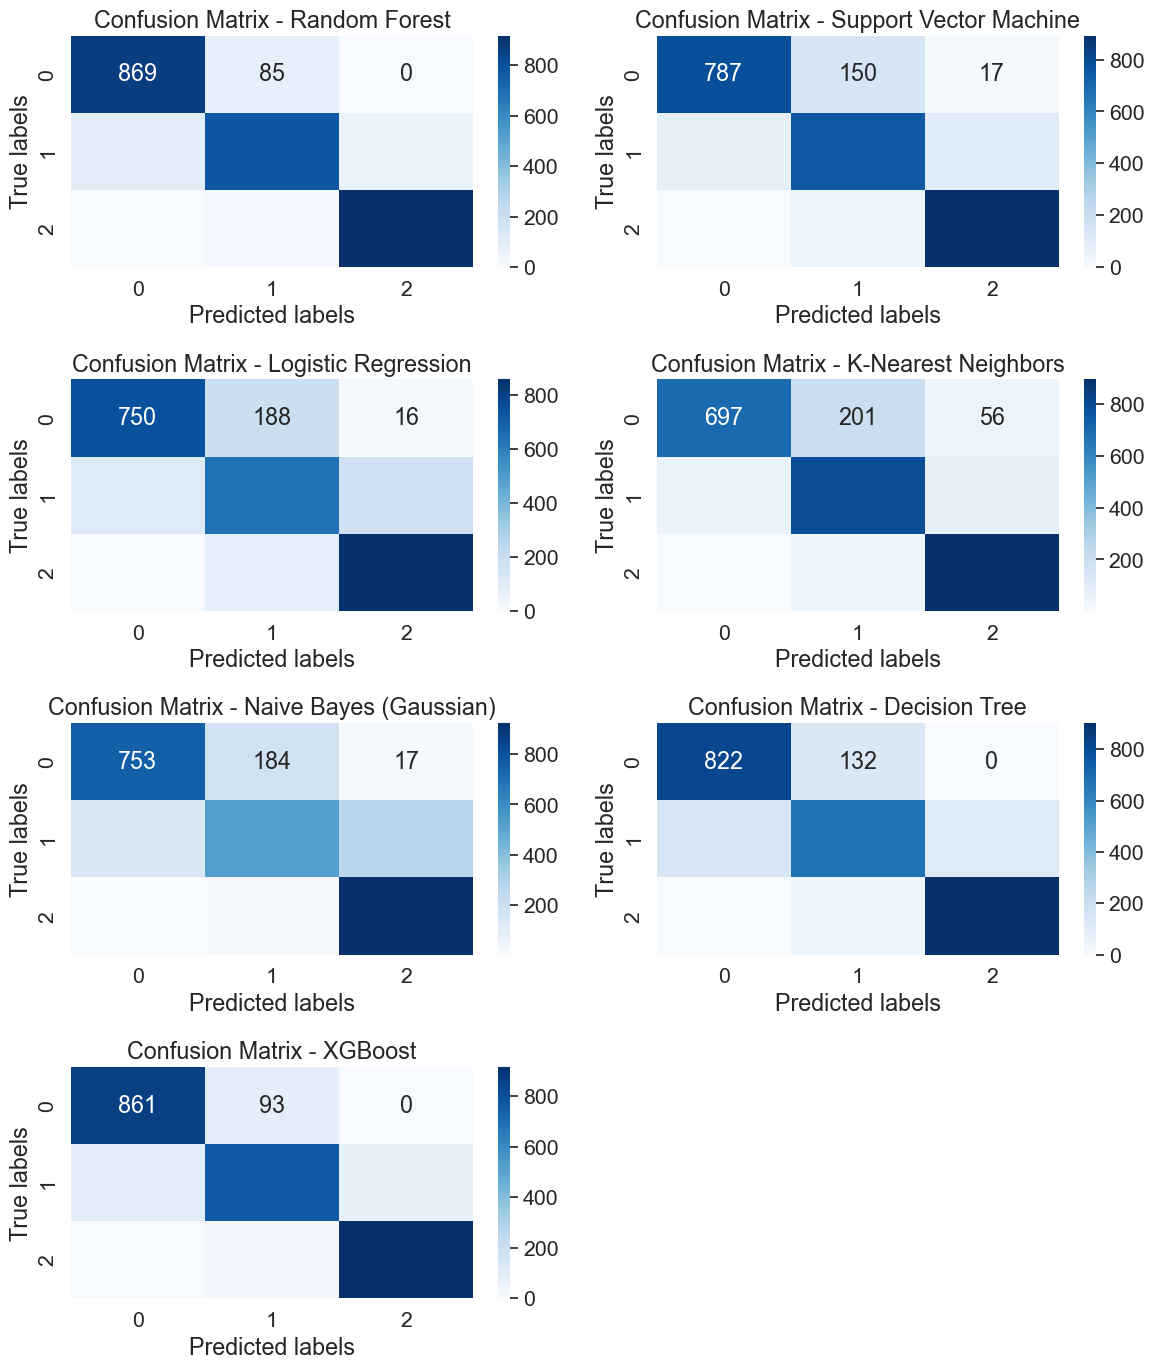

In [73]:
# Plot confusion matrices
plt.figure(figsize=(12, 14))
for i, (name, result) in enumerate(results.items(), start=1):
    plt.subplot(4, 2, i) 
    sns.heatmap(result['Confusion Matrix'], annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
plt.tight_layout()
plt.show()

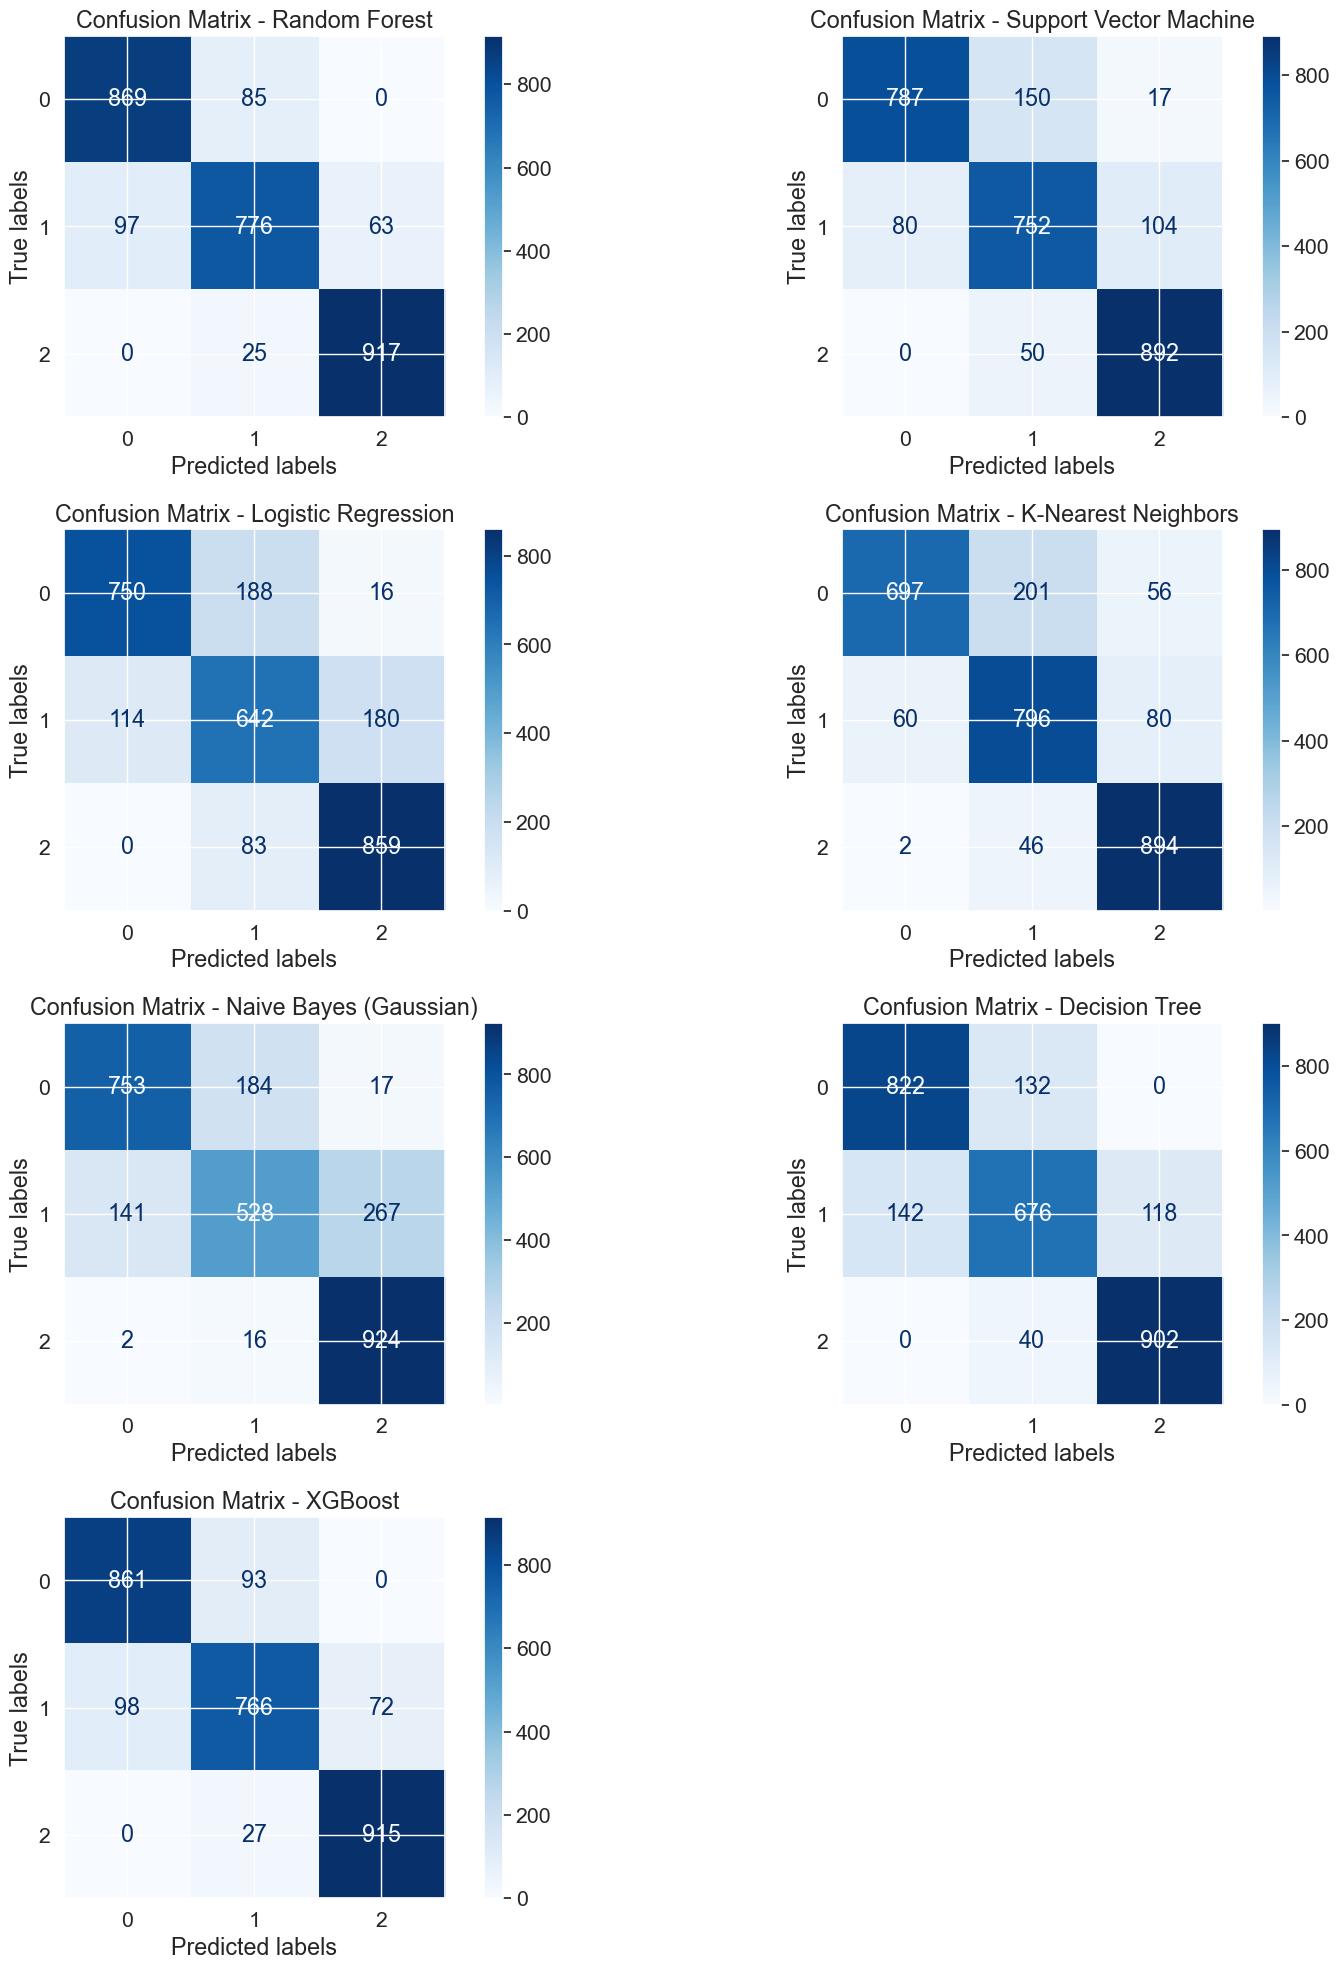

In [75]:
plt.figure(figsize=(16, 20)) 

# Determine the number of models to set appropriate subplot dimensions
n_models = len(results)
n_cols = 2 
n_rows = (n_models + 1) // n_cols  # This ensures enough rows to handle all models

for i, (name, result) in enumerate(results.items(), start=1):
    ax = plt.subplot(n_rows, n_cols, i)  
    ConfusionMatrixDisplay(result['Confusion Matrix'], display_labels=[0, 1, 2]).plot(cmap='Blues', ax=ax)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')

plt.tight_layout()

# Visualised the Target Variable after the prediction for each model


Classifier: Random Forest
Predicted Target Variables: [1. 0. 0. ... 1. 2. 1.]

Classifier: Support Vector Machine
Predicted Target Variables: [1. 0. 0. ... 1. 2. 1.]

Classifier: Logistic Regression
Predicted Target Variables: [2. 0. 0. ... 1. 2. 1.]

Classifier: K-Nearest Neighbors
Predicted Target Variables: [1. 0. 0. ... 1. 2. 1.]

Classifier: Naive Bayes (Gaussian)
Predicted Target Variables: [2. 0. 1. ... 2. 2. 1.]

Classifier: Decision Tree
Predicted Target Variables: [1. 0. 0. ... 2. 2. 0.]

Classifier: XGBoost
Predicted Target Variables: [1 0 0 ... 1 2 0]


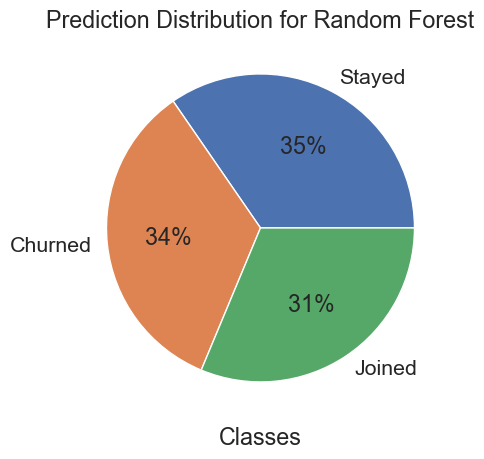

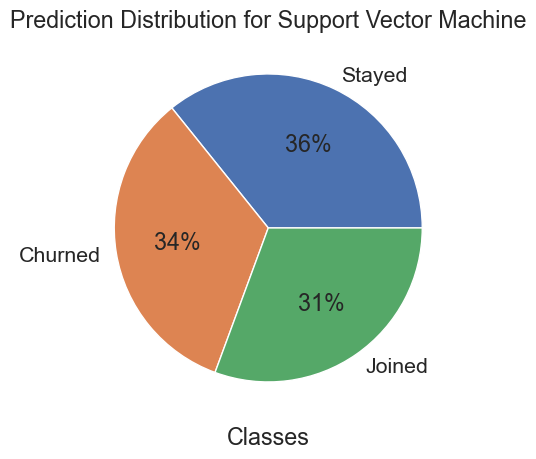

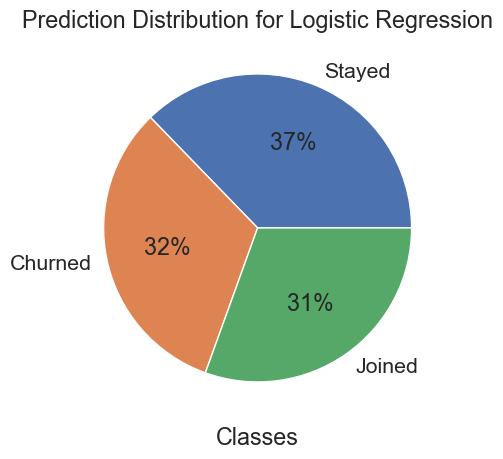

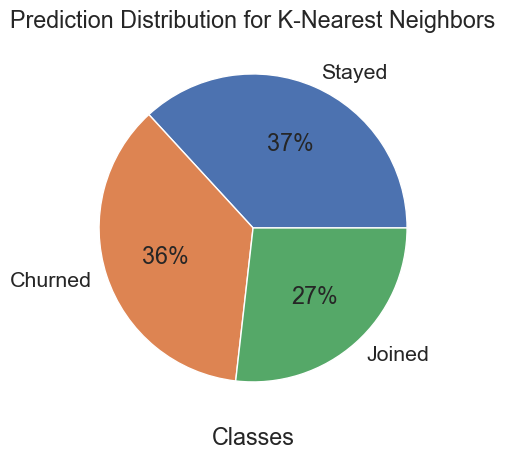

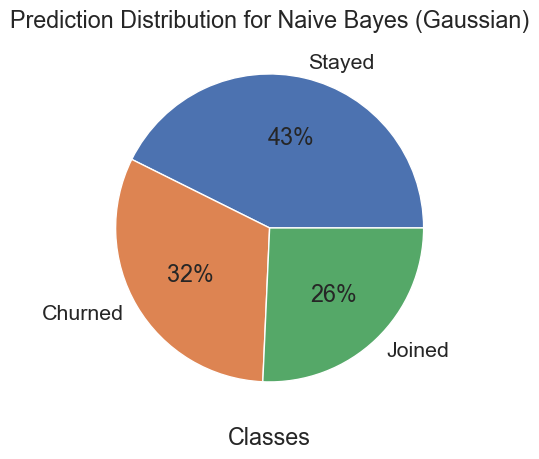

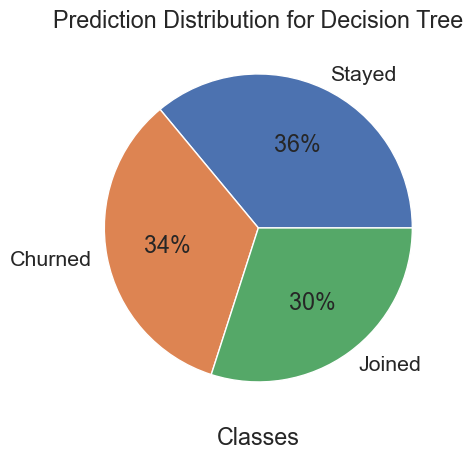

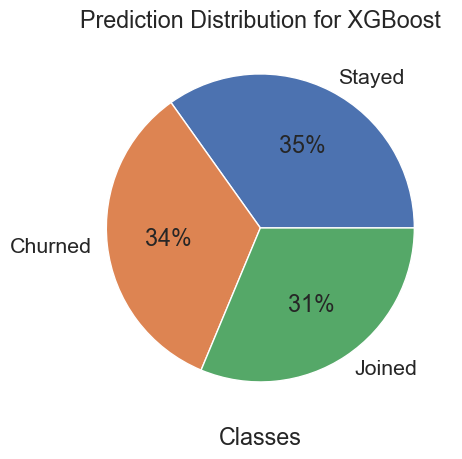

In [76]:
# Display predictions 
for name, result in results.items():
    print(f"\nClassifier: {name}")
    print("Predicted Target Variables:", predictions[name])
    
    # Convert predictions to a pandas series
    y_pred_series = pd.Series(predictions[name], name="Predicted")
    
    labels = ['Stayed', 'Churned', 'Joined']
    values = y_pred_series.value_counts().values
    
    # Visualize the prediction distribution
    plt.figure(figsize=(10, 5))
    plt.pie(values, labels=labels, autopct='%1.0f%%')
    plt.title(f'Prediction Distribution for {name}')
    plt.xlabel('Classes')

# Visualize ROC-Auc for SVM

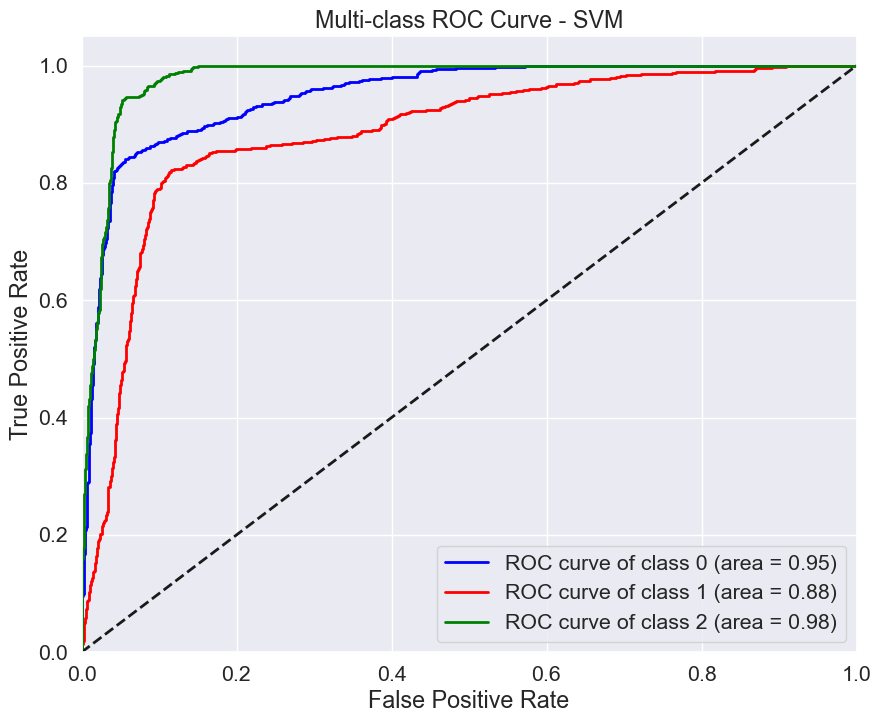

In [99]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scipy.special import expit as sigmoid  # Sigmoid function for converting decision function outputs

# Defined X_test and y_test, and the SVM pipeline has been trained:
y_score = pipelines['Support Vector Machine'].decision_function(X_test)

# Convert scores to probabilities using the sigmoid function
y_proba = sigmoid(y_score)

# Binarize the labels for a multi-class setup
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Calculate ROC curve and ROC area for each class
n_classes = y_test_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve - SVM')
plt.legend(loc="lower right")
plt.show()


In [77]:
print("Training labels distribution:")
print(np.bincount(y_train))
print("Testing labels distribution:")
print(np.bincount(y_test))

Training labels distribution:
[3766 3784 3778]
Testing labels distribution:
[954 936 942]


# Visualize ROC-AUC For remaining models

ROC curve not plotted for Support Vector Machine as it lacks predict_proba method.


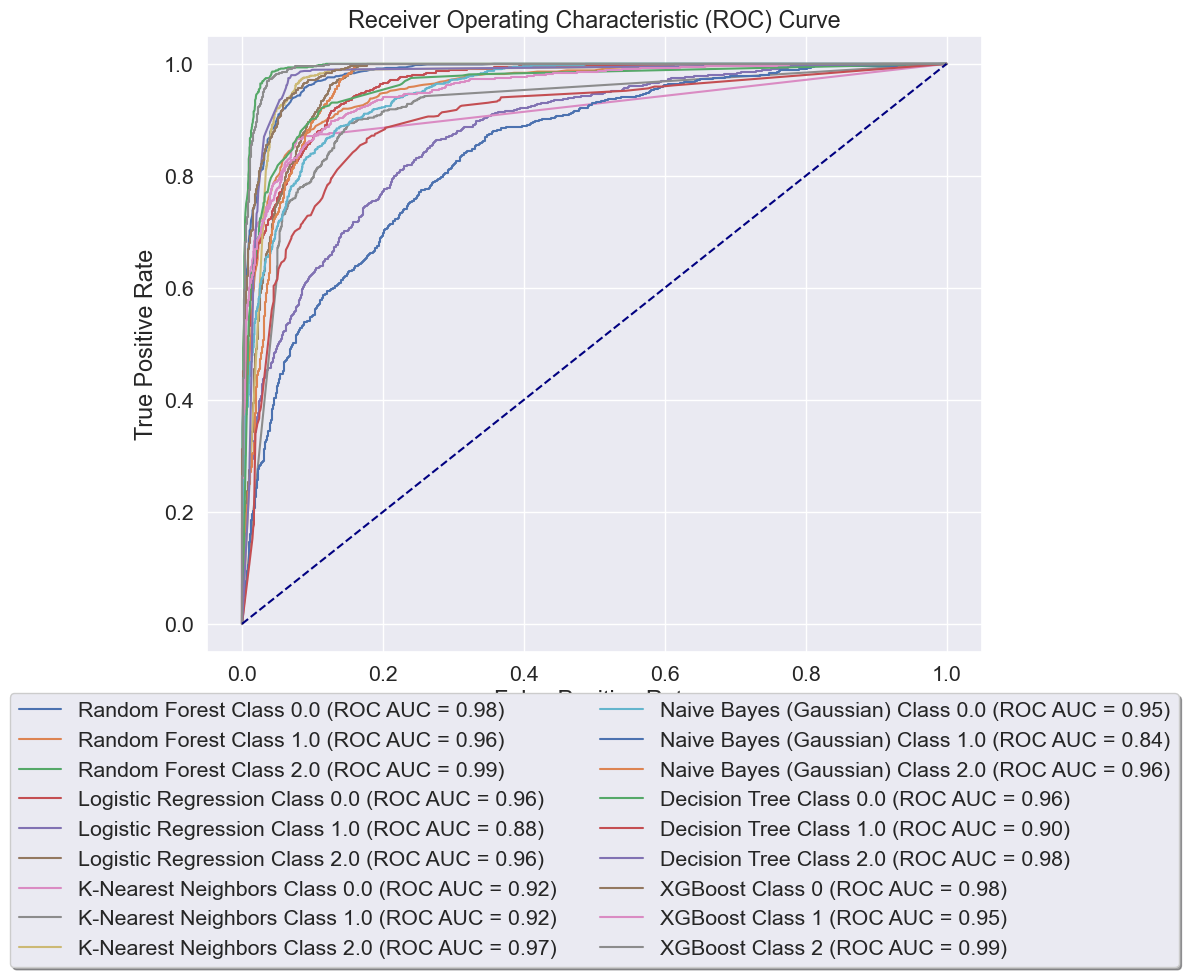

In [78]:
# Plot ROC curves for each classifier Except SVM
plt.figure(figsize=(10, 8))
for name, pipeline in pipelines.items():
    if hasattr(pipeline, 'predict_proba'):
        y_proba = pipeline.predict_proba(X_test)
        for i in range(len(pipeline.classes_)):
            fpr, tpr, _ = roc_curve(y_test == pipeline.classes_[i], y_proba[:, i])
            roc_auc_class = roc_auc_score(y_test == pipeline.classes_[i], y_proba[:, i])
            plt.plot(fpr, tpr, label=f'{name} Class {pipeline.classes_[i]} (ROC AUC = {roc_auc_class:.2f})')
    else:
        print(f"ROC curve not plotted for {name} as it lacks predict_proba method.")

# Plot baseline for random guessing
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)
plt.show()

# Iplot ROC-AUC for each Model

ROC curve not plotted for Support Vector Machine as it lacks predict_proba method.


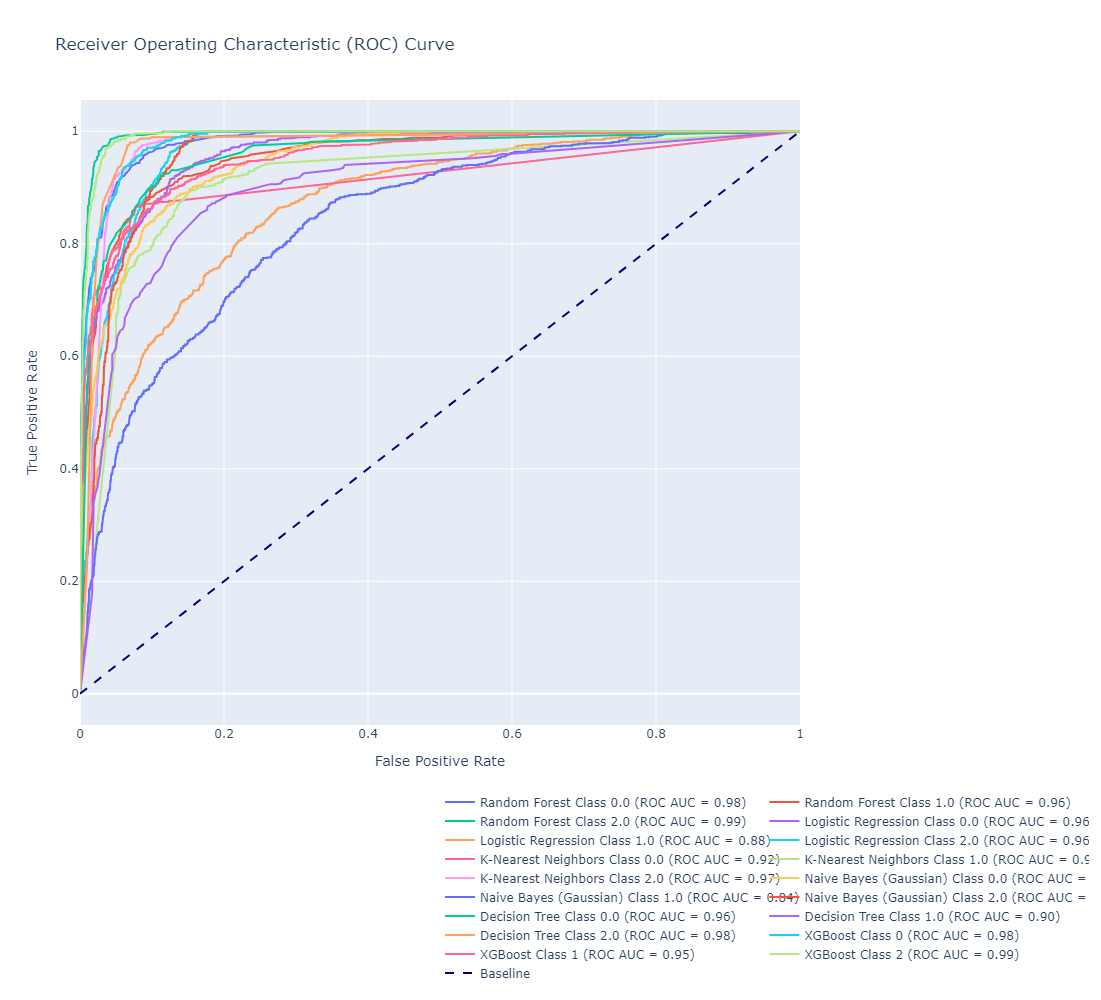

In [79]:
#import libraries for Iplot Except
import plotly.graph_objs as go
from plotly.offline import iplot

# Initialize the figure
fig = go.Figure()

# Iterate over pipelines and plot ROC curves
for name, pipeline in pipelines.items():
    if hasattr(pipeline, 'predict_proba'):
        y_proba = pipeline.predict_proba(X_test)
        for i in range(len(pipeline.classes_)):
            fpr, tpr, _ = roc_curve(y_test == pipeline.classes_[i], y_proba[:, i])
            roc_auc_class = roc_auc_score(y_test == pipeline.classes_[i], y_proba[:, i])
            fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'{name} Class {pipeline.classes_[i]} (ROC AUC = {roc_auc_class:.2f})'))
    else:
        print(f"ROC curve not plotted for {name} as it lacks predict_proba method.")

# Add baseline for random guessing
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Baseline', line=dict(color='navy', dash='dash')))

# Update layout
fig.update_layout(
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    title='Receiver Operating Characteristic (ROC) Curve',
    legend=dict(x=0.5, y=-0.1, orientation='h', bgcolor='rgba(0,0,0,0)'),
    autosize=False,
    width=800,
    height=1000,
)

# Show interactive plot
iplot(fig)


In [80]:
# Define a function to calculate a weighted score for each classifier
def calculate_weighted_score(metrics):
    weights = {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0}
    score = 0
    for key, weight in weights.items():
        score += metrics[key] * weight
    return score / sum(weights.values())

# Calculate scores for each classifier and find the best one
best_classifier_name = None
best_score = -1
for name, result in results.items():
    score = calculate_weighted_score(result)
    if score > best_score:
        best_score = score
        best_classifier_name = name

print(f"The best classifier based on aggregate metrics is: {best_classifier_name} with a score of {best_score}")


The best classifier based on aggregate metrics is: Random Forest with a score of 0.9042350024907119


# Analysis of Results
Random Forest shows the highest accuracy, precision, recall, and F1 Score, indicating it is the most effective model across the board for predicting churn. It balances correctly identifying churners with not falsely labeling non-churners as churners.
Application: This model's robust performance makes it ideal for implementing proactive retention strategies. It minimizes both false positives and false negatives, which means you can confidently offer incentives, personalized communications, or interventions to the customers most likely to churn according to the model's predictions. This helps in maximizing resource allocation by targeting only those who need intervention.

# Printing the most Important features

In [81]:
# X_train is the training data dataframe
feature_names = X_train.columns

# Get the best pipeline and its classifier
best_pipeline = pipelines[best_classifier_name]

# Access the best estimator in case of GridSearchCV or directly the pipeline
if hasattr(best_pipeline, 'best_estimator_'):
    best_classifier = best_pipeline.best_estimator_.named_steps['classifier']
else:
    best_classifier = best_pipeline.named_steps['classifier']

# Check if the classifier has feature importances
if hasattr(best_classifier, 'feature_importances_'):
    importances = best_classifier.feature_importances_
    indices = np.argsort(importances)[::-1]  # Sort features by importance

    print("Feature importances:")
    for i in indices:
        print(f"{feature_names[i]}: {importances[i]:.4f}")
else:
    print("This classifier does not provide feature importances.")



Feature importances:
Number of Dependents: 0.1830
Streaming TV: 0.1302
Device Protection Plan: 0.1174
Internet Type: 0.0914
Premium Tech Support: 0.0871
Online Backup: 0.0742
Married: 0.0498
Online Security: 0.0412
Latitude: 0.0367
Tenure in Months: 0.0270
Age: 0.0261
Longitude: 0.0260
Avg Monthly GB Download: 0.0206
Avg Monthly Long Distance Charges: 0.0199
Gender: 0.0160
Offer: 0.0136
Phone Service: 0.0117
Multiple Lines: 0.0115
Internet Service: 0.0100
Number of Referrals: 0.0065


In [82]:
# Create a DataFrame from the results dictionary
data_for_table = {
    'Classifier': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Positive Rate': []
}

In [83]:
# function for creating table
for classifier, metrics in results.items():
    data_for_table['Classifier'].append(classifier)
    data_for_table['Accuracy'].append(metrics['Accuracy'])
    data_for_table['Precision'].append(metrics['Precision'])
    data_for_table['Recall'].append(metrics['Recall'])
    data_for_table['F1 Score'].append(metrics['F1 Score'])
    data_for_table['Positive Rate'].append(metrics['Positive Rate'])

df_results = pd.DataFrame(data_for_table)


In [84]:
# Using DataFrame.style to add style
styled_df = df_results.style.set_table_styles(
    [{
        'selector': 'thead',
        'props': [('background-color', 'black'), ('color', 'white')]
    }]
).set_properties(**{
    'color': 'black',  # Text color for non-header cells
    'background-color': 'lightgrey',  # Background color for non-header cells
    'border-color': 'white'  # Border color
}).applymap(lambda x: 'color: red' if isinstance(x, float) and x < 0.9 else 'color: black')

# Print styled DataFrame (note: this will display properly in Jupyter-like environments)
styled_df

C:\Users\Windows\AppData\Local\Temp\ipykernel_820\3281809969.py:11: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



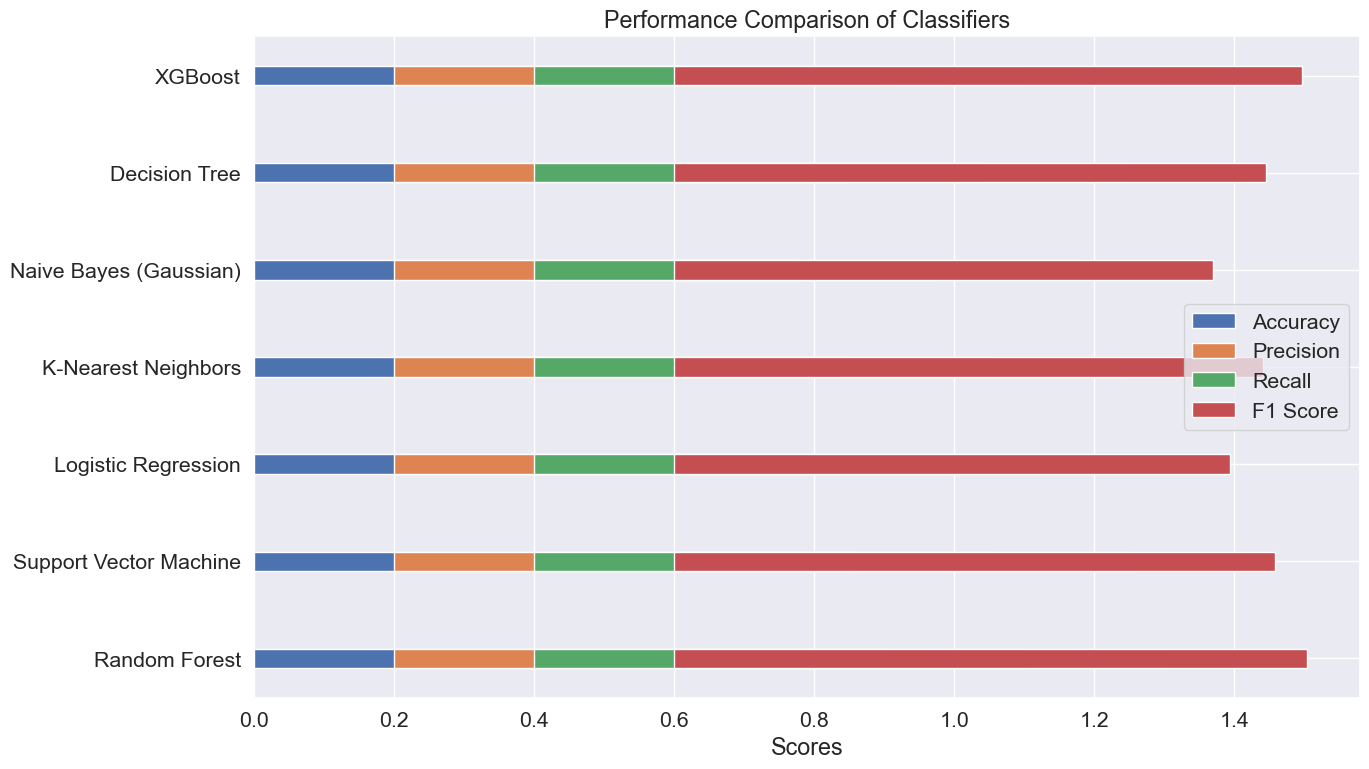

In [85]:
# Plotting bar charts for comparison
fig, ax = plt.subplots(figsize=(14, 8))
# We plot only Accuracy, Precision, Recall, and F1 Score for clarity
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
width = 0.2  # the width of the bars

for i, metric in enumerate(metrics_to_plot):
    ax.barh(df_results['Classifier'], df_results[metric], width, label=metric, left=i*width)

ax.set_xlabel('Scores')
ax.set_title('Performance Comparison of Classifiers')
ax.legend()

plt.tight_layout()
plt.show()

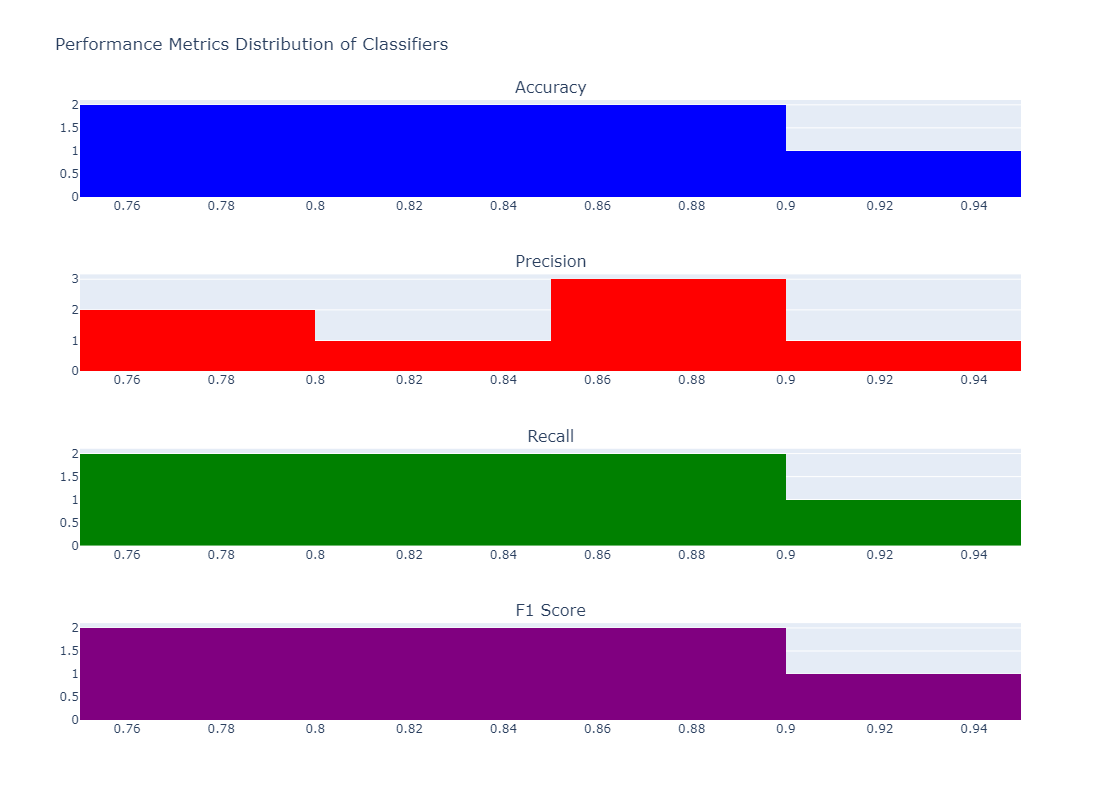

In [86]:
from plotly.subplots import make_subplots

# Assuming 'results' contains all the metrics from the evaluations
data_for_plot = {
    'Classifier': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

for classifier, metrics in results.items():
    data_for_plot['Classifier'].append(classifier)
    data_for_plot['Accuracy'].append(metrics['Accuracy'])
    data_for_plot['Precision'].append(metrics['Precision'])
    data_for_plot['Recall'].append(metrics['Recall'])
    data_for_plot['F1 Score'].append(metrics['F1 Score'])

df_results = pd.DataFrame(data_for_plot)

# Create subplots: one row for each metric
fig = make_subplots(rows=4, cols=1, subplot_titles=("Accuracy", "Precision", "Recall", "F1 Score"))

# Add histograms to the subplots
fig.add_trace(go.Histogram(x=df_results['Accuracy'], name='Accuracy', marker=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Histogram(x=df_results['Precision'], name='Precision', marker=dict(color='red')), row=2, col=1)
fig.add_trace(go.Histogram(x=df_results['Recall'], name='Recall', marker=dict(color='green')), row=3, col=1)
fig.add_trace(go.Histogram(x=df_results['F1 Score'], name='F1 Score', marker=dict(color='purple')), row=4, col=1)

# Update layout
fig.update_layout(title_text="Performance Metrics Distribution of Classifiers", height=800, showlegend=False)
fig.show()

In [87]:
import plotly.express as px

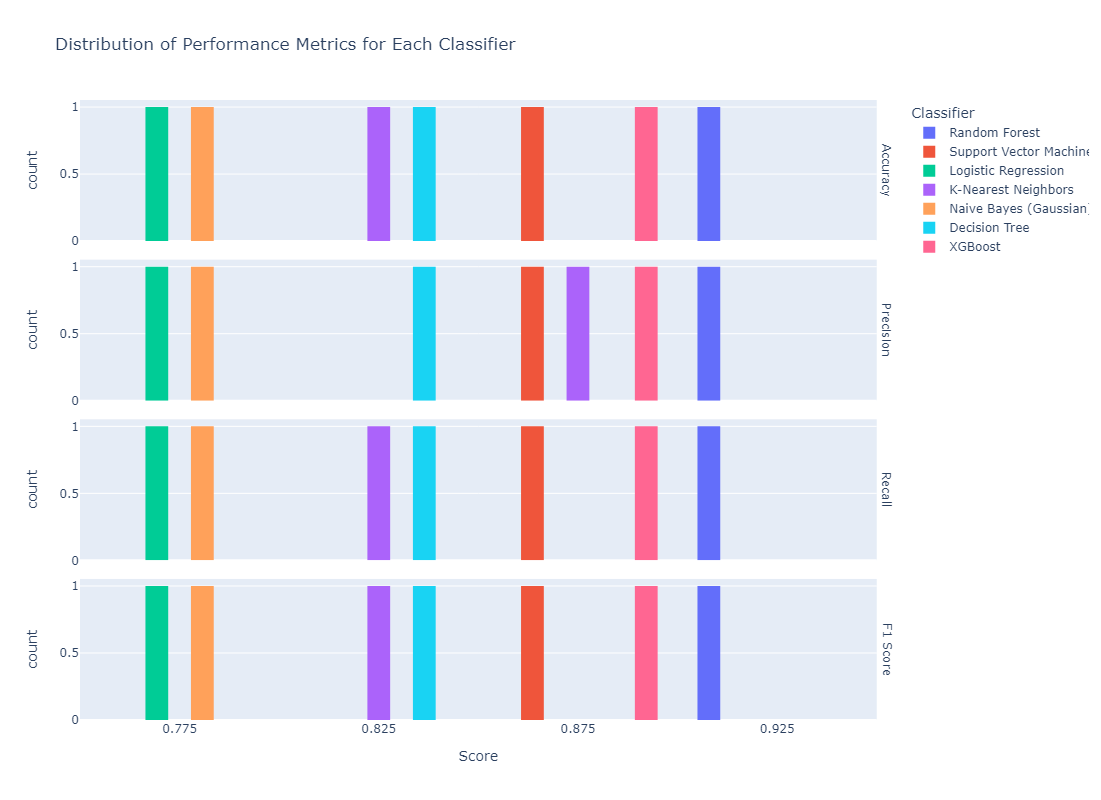

In [88]:
#results contains all the metrics from the evaluations
data_for_plot = {
    'Classifier': [],
    'Metric Type': [],
    'Value': []
}

for classifier, metrics in results.items():
    data_for_plot['Classifier'].extend([classifier] * 4)
    data_for_plot['Metric Type'].extend(['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    data_for_plot['Value'].extend([
        metrics['Accuracy'],
        metrics['Precision'],
        metrics['Recall'],
        metrics['F1 Score']
    ])

df_results = pd.DataFrame(data_for_plot)

# Plotting using Plotly Express
fig = px.histogram(df_results, x='Value', color='Classifier', facet_row='Metric Type',
                   labels={'Value': 'Score'}, barmode='group',
                   height=800, width=800,
                   title='Distribution of Performance Metrics for Each Classifier',
                   category_orders={"Metric Type": ["Accuracy", "Precision", "Recall", "F1 Score"]})

# Update layout to adjust individual plot properties
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_layout(showlegend=True)
fig.show()

In [89]:
# Install SHAP For Explanable AI For the Best model
!pip install shap

Defaulting to user installation because normal site-packages is not writeable


In [90]:
import shap

In [91]:
print(X_test.shape)
print(X_test.columns)

(2832, 32)
Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'Latitude',
       'Longitude', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')


# Using Shap to Explain the best model. how it arrived to decision making 

100%|===================| 21095/21129 [02:35<00:00]        

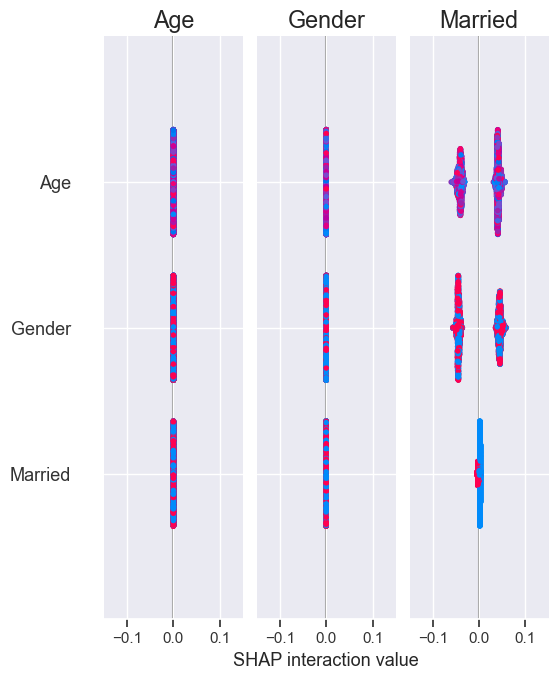

In [92]:
# Train the best classifier on the entire dataset with the best parameters
best_pipeline.fit(X, y)

# Access the best estimator in case of GridSearchCV or directly the pipeline
if hasattr(best_pipeline, 'best_estimator_'):
    best_classifier = best_pipeline.best_estimator_.named_steps['classifier']
else:
    best_classifier = best_pipeline.named_steps['classifier']

# Initialize SHAP explainer with the trained classifier
explainer = shap.Explainer(best_classifier, X)

# Extract feature importances
if hasattr(best_classifier, 'feature_importances_'):
    # X is the entire feature set
    shap_values = explainer.shap_values(X)

    # Plot SHAP summary plot
    shap.summary_plot(shap_values, X, feature_names=feature_names)
else:
    print("This classifier does not provide feature importances.")


# Analysis of Important Features from the SHAP
Feature Interaction: The plot shows how features like Age, Gender, and Married status interact with each other and contribute to the model’s prediction of customer churn.
SHAP Values: These values quantify the impact of each feature on the prediction. A positive SHAP value indicates a higher likelihood of churn, while a negative value suggests a lower likelihood.
Color Coding: The dots are colored to represent the value of the feature; for example, blue might indicate male gender and pink might indicate female gender.
Distribution of Dots: The arrangement of dots across the plots illustrates the strength and direction of the interaction between features. For instance, a diagonal distribution in the Age-Age plot suggests a strong relationship between a customer’s age and their likelihood of churning.